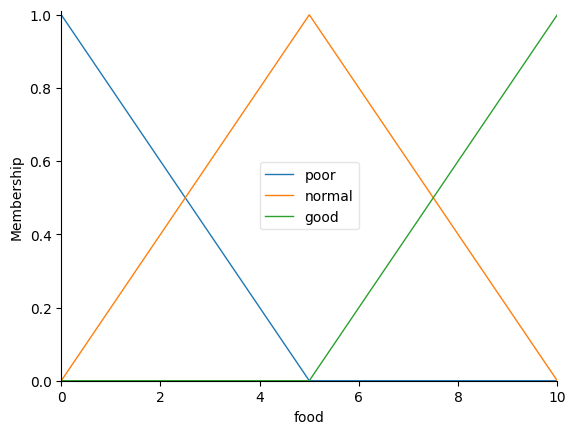

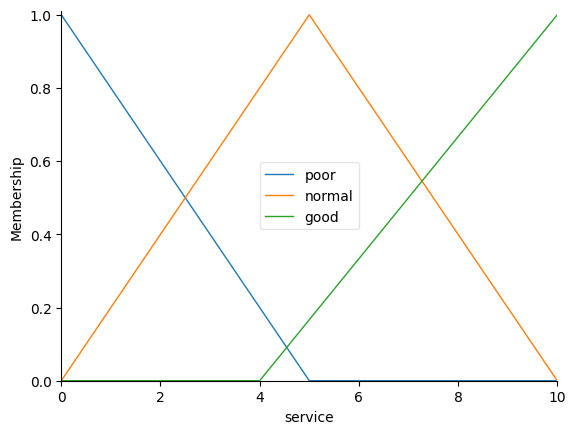

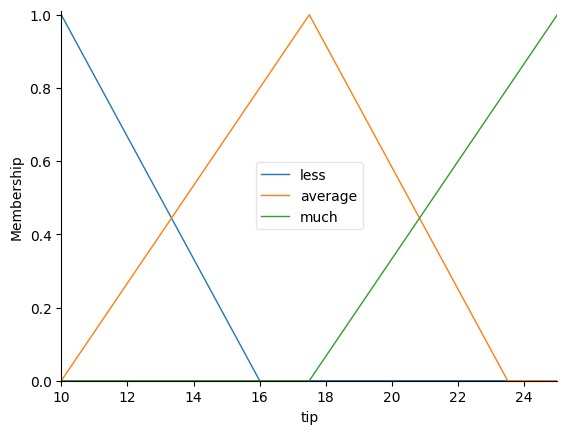

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food=ctrl.Antecedent(np.arange(0,10.1,0.1),'food') #antecedent là input
service=ctrl.Antecedent(np.arange(0,10.1,0.1),'service')
tip=ctrl.Consequent(np.arange(10,25.1,0.1),'tip') #consequent là output

food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['normal']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['normal']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[4,10,10])

tip['less']=fuzz.trimf(tip.universe,[10,10,16])
tip['average']=fuzz.trimf(tip.universe,[10,17.5,23.5])
tip['much']=fuzz.trimf(tip.universe,[17.5,25,25])

food.view()
service.view()
tip.view()




17.842930725435487


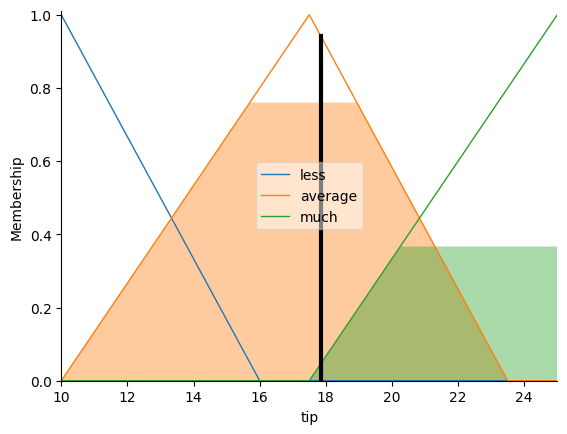

In [ ]:
rule1=ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2=ctrl.Rule(food['poor']&service['normal'],tip['less'])
rule3=ctrl.Rule(food['poor']&service['good'],tip['average'])

rule4=ctrl.Rule(food['normal']&service['poor'],tip['less'])
rule5=ctrl.Rule(food['normal']&service['normal'],tip['average'])
rule6=ctrl.Rule(food['normal']&service['good'],tip['average'])

rule7=ctrl.Rule(food['good']&service['poor'],tip['average'])
rule8=ctrl.Rule(food['good']&service['normal'],tip['average'])
rule9=ctrl.Rule(food['good']&service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=10
tipping.input['service']=6.2
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

18.02433600932119


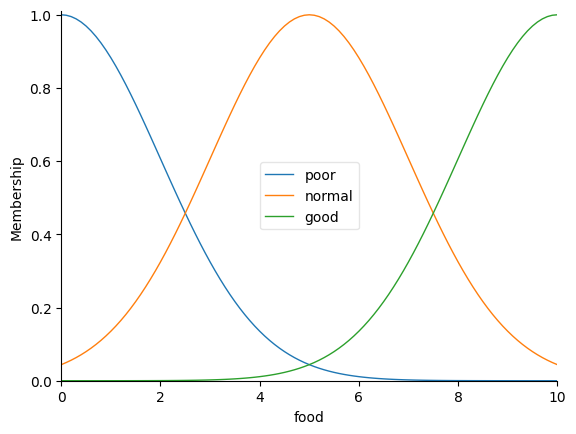

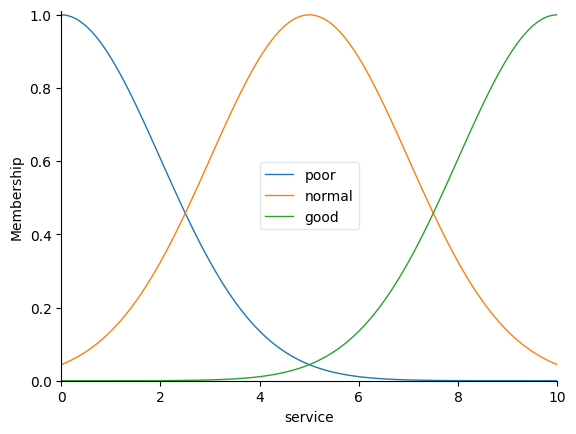

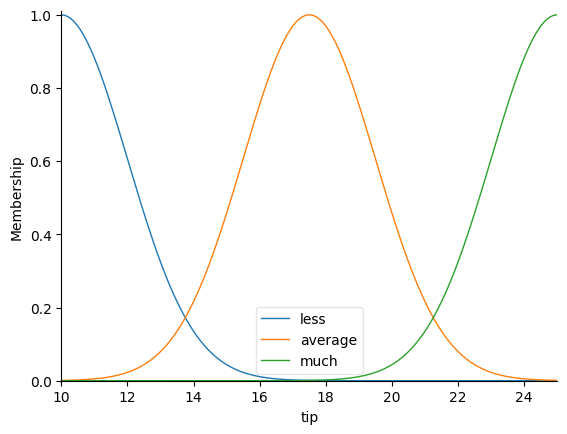

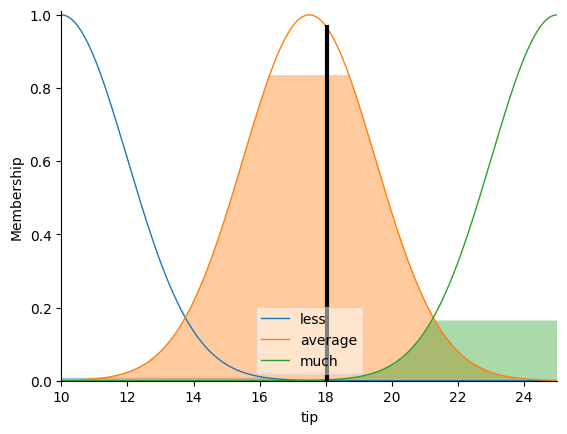

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food=ctrl.Antecedent(np.arange(0,10.1,0.1),'food') #antecedent là input
service=ctrl.Antecedent(np.arange(0,10.1,0.1),'service')
tip=ctrl.Consequent(np.arange(10,25.1,0.1),'tip') #consequent là output

food['poor']=fuzz.gaussmf(food.universe,0,2)
food['normal']=fuzz.gaussmf(food.universe,5,2)
food['good']=fuzz.gaussmf(food.universe,10,2)

service['poor']=fuzz.gaussmf(service.universe,0,2)
service['normal']=fuzz.gaussmf(service.universe,5,2)
service['good']=fuzz.gaussmf(service.universe,10,2)

tip['less']=fuzz.gaussmf(tip.universe,10,2)
tip['average']=fuzz.gaussmf(tip.universe,17.5,2)
tip['much']=fuzz.gaussmf(tip.universe,25,2)

#xem đồ thị
food.view()
service.view()
tip.view()

rule1=ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2=ctrl.Rule(food['poor']&service['normal'],tip['less'])
rule3=ctrl.Rule(food['poor']&service['good'],tip['average'])

rule4=ctrl.Rule(food['normal']&service['poor'],tip['less'])
rule5=ctrl.Rule(food['normal']&service['normal'],tip['average'])
rule6=ctrl.Rule(food['normal']&service['good'],tip['average'])

rule7=ctrl.Rule(food['good']&service['poor'],tip['average'])
rule8=ctrl.Rule(food['good']&service['normal'],tip['average'])
rule9=ctrl.Rule(food['good']&service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=10
tipping.input['service']=6.2
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)



69.40565544608462


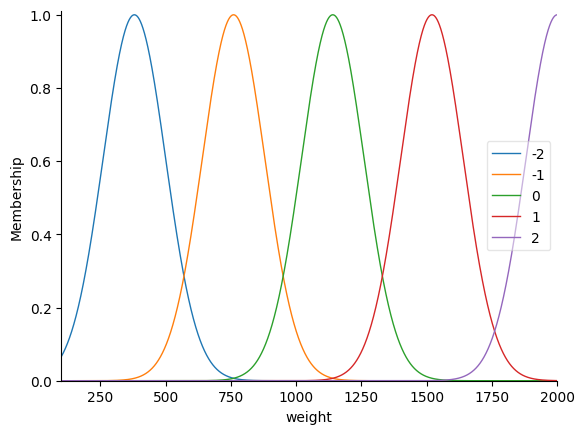

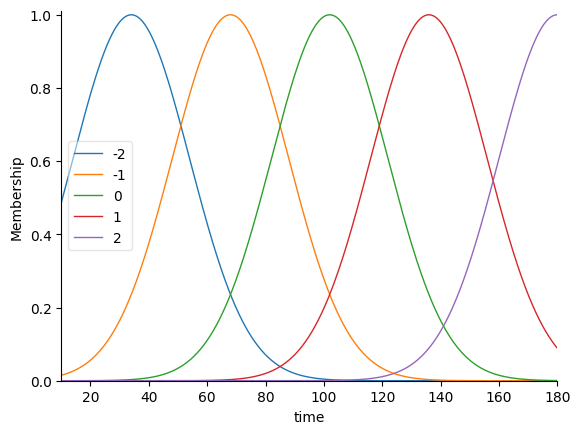

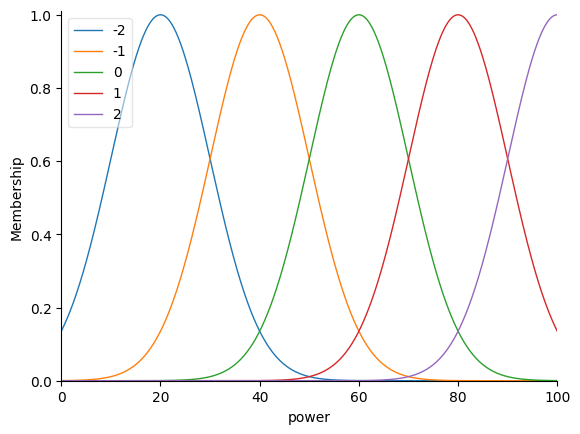

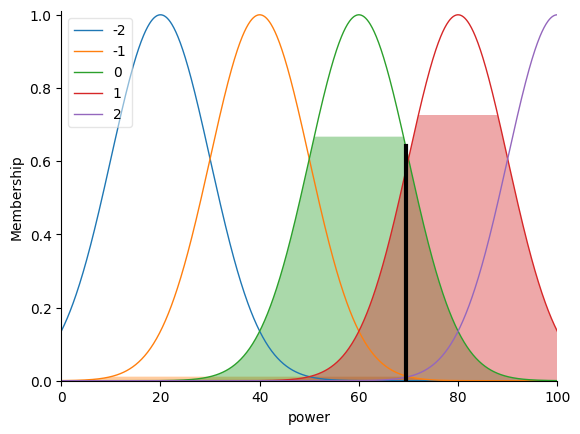

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

weight=ctrl.Antecedent(np.arange(100,2000.1,0.1),'weight') #antecedent là input
time=ctrl.Antecedent(np.arange(10,180.1,0.1),'time')
power=ctrl.Consequent(np.arange(0,100.1,0.1),'power') #consequent là output

weight['-2']=fuzz.gaussmf(weight.universe,380,120)
weight['-1']=fuzz.gaussmf(weight.universe,760,120)
weight['0']=fuzz.gaussmf(weight.universe,1140,120)
weight['1']=fuzz.gaussmf(weight.universe,1520,120)
weight['2']=fuzz.gaussmf(weight.universe,2000,120)

time['-2']=fuzz.gaussmf(time.universe,34,20)
time['-1']=fuzz.gaussmf(time.universe,68,20)
time['0']=fuzz.gaussmf(time.universe,102,20)
time['1']=fuzz.gaussmf(time.universe,136,20)
time['2']=fuzz.gaussmf(time.universe,180,20)

power['-2']=fuzz.gaussmf(power.universe,20,10)
power['-1']=fuzz.gaussmf(power.universe,40,10)
power['0']=fuzz.gaussmf(power.universe,60,10)
power['1']=fuzz.gaussmf(power.universe,80,10)
power['2']=fuzz.gaussmf(power.universe,100,10)


#xem đồ thị
weight.view()
time.view()
power.view()

rule1=ctrl.Rule(weight['-2']&time['-2'],power['-2'])
rule2=ctrl.Rule(weight['-2']&time['-1'],power['-2'])
rule3=ctrl.Rule(weight['-2']&time['0'],power['-2'])
rule4=ctrl.Rule(weight['-2']&time['1'],power['-1'])
rule5=ctrl.Rule(weight['-2']&time['2'],power['-1'])

rule6=ctrl.Rule(weight['-1']&time['-2'],power['-2'])
rule7=ctrl.Rule(weight['-1']&time['-1'],power['-1'])
rule8=ctrl.Rule(weight['-1']&time['0'],power['0'])
rule9=ctrl.Rule(weight['-1']&time['1'],power['1'])
rule10=ctrl.Rule(weight['-1']&time['2'],power['1'])

rule11=ctrl.Rule(weight['0']&time['-2'],power['-1'])
rule12=ctrl.Rule(weight['0']&time['-1'],power['-1'])
rule13=ctrl.Rule(weight['0']&time['0'],power['0'])
rule14=ctrl.Rule(weight['0']&time['1'],power['0'])
rule15=ctrl.Rule(weight['0']&time['2'],power['1'])

rule16=ctrl.Rule(weight['1']&time['-2'],power['-1'])
rule17=ctrl.Rule(weight['1']&time['-1'],power['0'])
rule18=ctrl.Rule(weight['1']&time['0'],power['0'])
rule19=ctrl.Rule(weight['1']&time['1'],power['1'])
rule20=ctrl.Rule(weight['1']&time['2'],power['1'])

rule21=ctrl.Rule(weight['2']&time['-2'],power['0'])
rule22=ctrl.Rule(weight['2']&time['-1'],power['1'])
rule23=ctrl.Rule(weight['2']&time['0'],power['1'])
rule24=ctrl.Rule(weight['2']&time['1'],power['2'])
rule25=ctrl.Rule(weight['2']&time['2'],power['2'])


powering_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['weight']=1500
powering.input['time']=120
powering.compute()
print(powering.output['power'])
power.view(sim=powering)



2.253826096927807


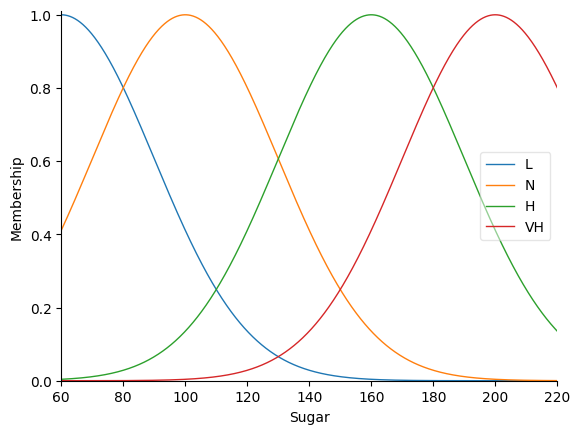

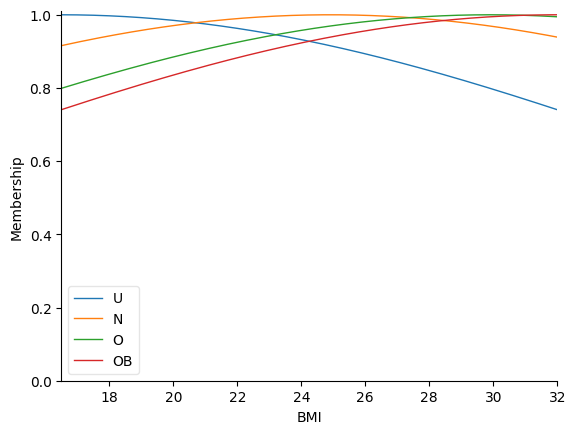

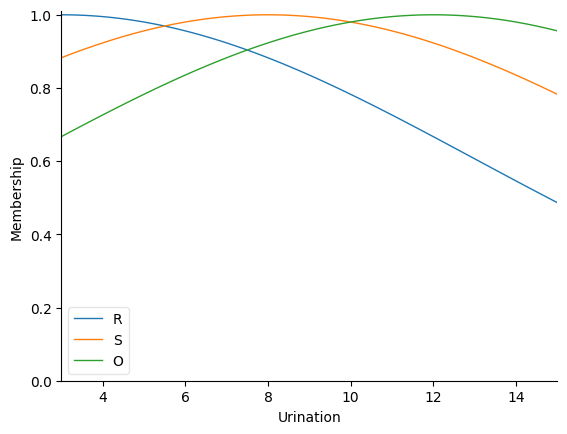

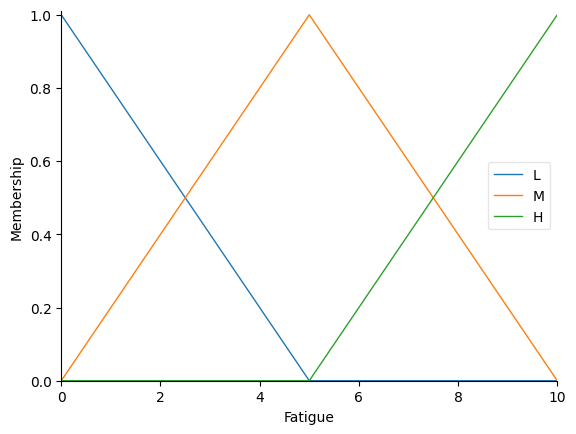

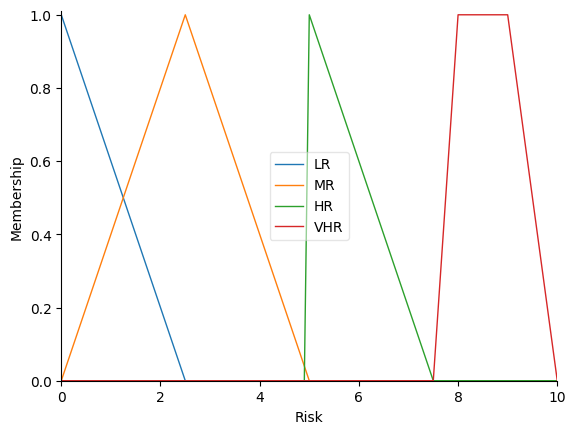

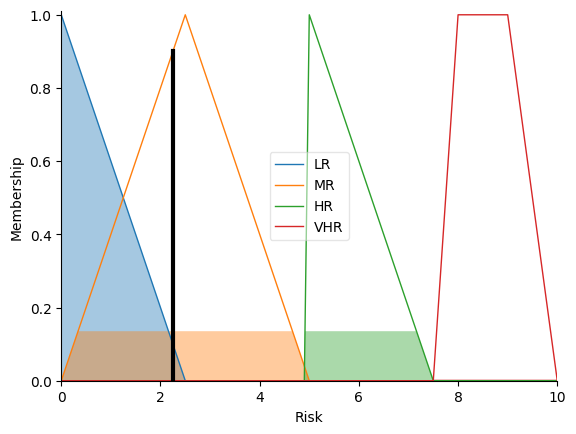

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Sugar=ctrl.Antecedent(np.arange(60,220.1,0.1),'Sugar') #antecedent là input
BMI=ctrl.Antecedent(np.arange(16.5,32.1,0.1),'BMI')
Urination=ctrl.Antecedent(np.arange(3,15.1,0.1),'Urination')
Fatigue=ctrl.Antecedent(np.arange(0,10.1,0.1),'Fatigue')
Risk=ctrl.Consequent(np.arange(0,10.1,0.1),'Risk') #consequent là output

Sugar['L']=fuzz.gaussmf(Sugar.universe,60,30)
Sugar['N']=fuzz.gaussmf(Sugar.universe,100,30)
Sugar['H']=fuzz.gaussmf(Sugar.universe,160,30)
Sugar['VH']=fuzz.gaussmf(Sugar.universe,200,30)

BMI['U']=fuzz.gaussmf(BMI.universe,16.5,20)
BMI['N']=fuzz.gaussmf(BMI.universe,24.9,20)
BMI['O']=fuzz.gaussmf(BMI.universe,29.9,20)
BMI['OB']=fuzz.gaussmf(BMI.universe,32,20)

Urination['R']=fuzz.gaussmf(Urination.universe,3,10)
Urination['S']=fuzz.gaussmf(Urination.universe,8,10)
Urination['O']=fuzz.gaussmf(Urination.universe,12,10)

Fatigue['L']=fuzz.trimf(Fatigue.universe,[0,0,5])
Fatigue['M']=fuzz.trimf(Fatigue.universe,[0,5,10])
Fatigue['H']=fuzz.trimf(Fatigue.universe,[5,10,10])

Risk['LR']=fuzz.trimf(Risk.universe,[0,0,2.5])
Risk['MR']=fuzz.trimf(Risk.universe,[0,2.5,5])
Risk['HR']=fuzz.trimf(Risk.universe,[5,5,7.5])
Risk['VHR']=fuzz.trapmf(Risk.universe,[7.5,8,9,10])

#xem đồ thị
Sugar.view()
BMI.view()
Urination.view()
Fatigue.view()
Risk.view()

rule1=ctrl.Rule(Sugar['VH']&Urination['O'],Risk['VHR'])
rule2=ctrl.Rule(Sugar['VH']&Urination['S'],Risk['HR'])
rule3=ctrl.Rule(Sugar['H']&Urination['O'],Risk['HR'])
rule4=ctrl.Rule(Sugar['N']&Urination['R'],Risk['LR'])

rule5=ctrl.Rule(Sugar['VH']&BMI['OB'],Risk['VHR'])
rule6=ctrl.Rule(Sugar['VH']&BMI['O'],Risk['HR'])
rule7=ctrl.Rule(Sugar['H']&BMI['O'],Risk['HR'])
rule8=ctrl.Rule(Sugar['N']&BMI['N'],Risk['LR'])

rule9=ctrl.Rule(Sugar['VH']&Fatigue['H'],Risk['VHR'])
rule10=ctrl.Rule(Sugar['H']&Fatigue['H'],Risk['HR'])
rule11=ctrl.Rule(Sugar['H']&Fatigue['M'],Risk['MR'])
rule12=ctrl.Rule(Sugar['N']&Fatigue['L'],Risk['LR'])


Risking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
Risking = ctrl.ControlSystemSimulation(Risking_ctrl)
Risking.input['Sugar']=100
Risking.input['BMI']=26.5
Risking.input['Urination']=5
Risking.input['Fatigue']=5
Risking.compute()
print(Risking.output['Risk'])
Risk.view(sim=Risking)


5.863120567375886


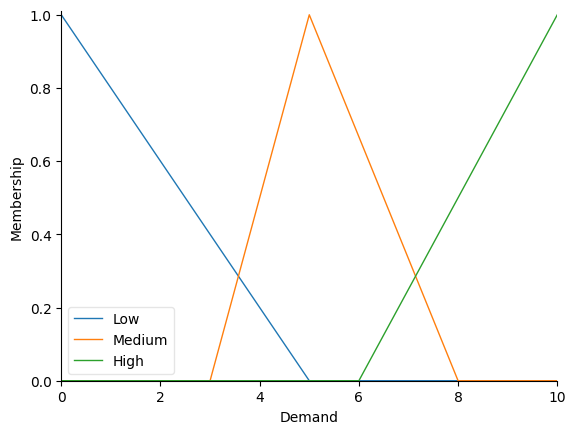

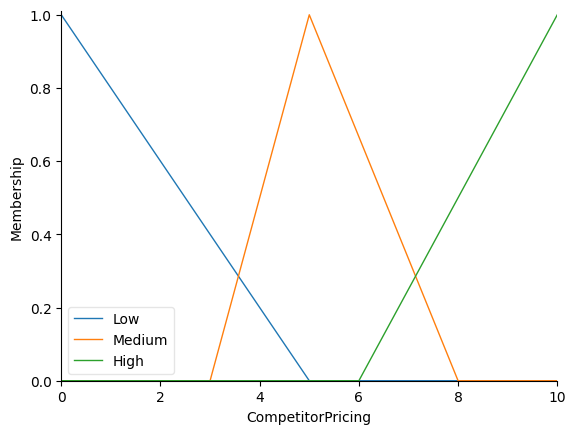

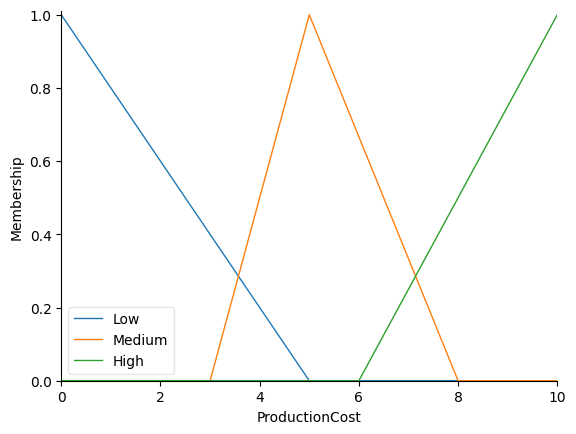

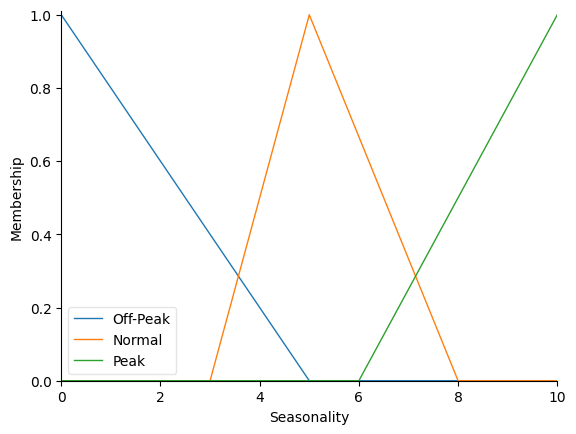

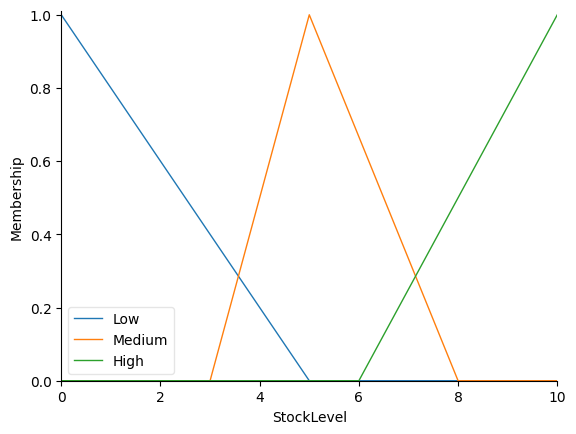

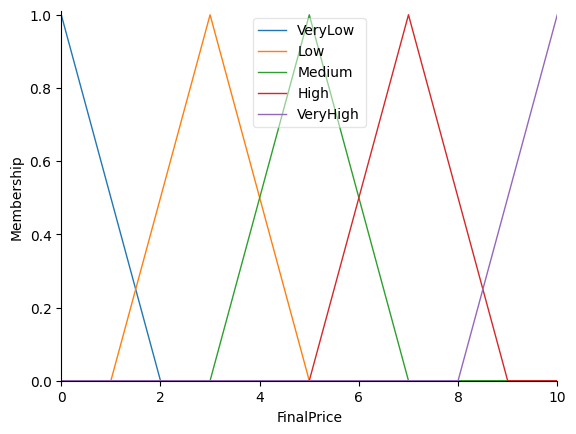

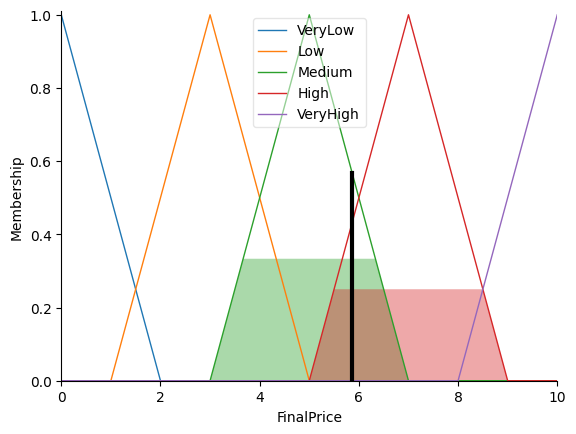

In [3]:
#2.3
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


Demand = ctrl.Antecedent(np.arange(0, 10.1, 1), 'Demand')
CompetitorPricing = ctrl.Antecedent(np.arange(0, 10.1, 1), 'CompetitorPricing')
ProductionCost = ctrl.Antecedent(np.arange(0, 10.1, 1), 'ProductionCost')
Seasonality = ctrl.Antecedent(np.arange(0, 10.1, 1), 'Seasonality')
StockLevel = ctrl.Antecedent(np.arange(0, 10.1, 1), 'StockLevel')
FinalPrice = ctrl.Consequent(np.arange(0, 10.1, 1), 'FinalPrice')


Demand['Low'] = fuzz.trimf(Demand.universe, [0, 0, 5])
Demand['Medium'] = fuzz.trimf(Demand.universe, [3, 5, 8])
Demand['High'] = fuzz.trimf(Demand.universe, [6, 10, 10])

CompetitorPricing['Low'] = fuzz.trimf(CompetitorPricing.universe, [0, 0, 5])
CompetitorPricing['Medium'] = fuzz.trimf(CompetitorPricing.universe, [3, 5, 8])
CompetitorPricing['High'] = fuzz.trimf(CompetitorPricing.universe, [6, 10, 10])

ProductionCost['Low'] = fuzz.trimf(ProductionCost.universe, [0, 0, 5])
ProductionCost['Medium'] = fuzz.trimf(ProductionCost.universe, [3, 5, 8])
ProductionCost['High'] = fuzz.trimf(ProductionCost.universe, [6, 10, 10])

Seasonality['Off-Peak'] = fuzz.trimf(Seasonality.universe, [0, 0, 5])
Seasonality['Normal'] = fuzz.trimf(Seasonality.universe, [3, 5, 8])
Seasonality['Peak'] = fuzz.trimf(Seasonality.universe, [6, 10, 10])

StockLevel['Low'] = fuzz.trimf(StockLevel.universe, [0, 0, 5])
StockLevel['Medium'] = fuzz.trimf(StockLevel.universe, [3, 5, 8])
StockLevel['High'] = fuzz.trimf(StockLevel.universe, [6, 10, 10])

FinalPrice['VeryLow'] = fuzz.trimf(FinalPrice.universe, [0, 0, 2])
FinalPrice['Low'] = fuzz.trimf(FinalPrice.universe, [1, 3, 5])
FinalPrice['Medium'] = fuzz.trimf(FinalPrice.universe, [3, 5, 7])
FinalPrice['High'] = fuzz.trimf(FinalPrice.universe, [5, 7, 9])
FinalPrice['VeryHigh'] = fuzz.trimf(FinalPrice.universe, [8, 10, 10])

Demand.view()
CompetitorPricing.view()
ProductionCost.view()
Seasonality.view()
StockLevel.view()
FinalPrice.view()

rule1 = ctrl.Rule(Demand['High'] & CompetitorPricing['High'] & StockLevel['Low'], FinalPrice['VeryHigh'])
rule2 = ctrl.Rule(Demand['High'] & Seasonality['Peak'] & StockLevel['Low'], FinalPrice['VeryHigh'])
rule3 = ctrl.Rule(Demand['Medium'] & ProductionCost['High'] & StockLevel['Low'], FinalPrice['VeryHigh'])

rule4 = ctrl.Rule(Demand['High'] & CompetitorPricing['Medium'] & StockLevel['Medium'], FinalPrice['High'])
rule5 = ctrl.Rule(Demand['Medium'] & CompetitorPricing['High'] & StockLevel['Low'], FinalPrice['High'])
rule6 = ctrl.Rule(Demand['High'] & Seasonality['Peak'] & StockLevel['Medium'], FinalPrice['High'])

rule7 = ctrl.Rule(Demand['Medium'] & CompetitorPricing['Medium'] & StockLevel['Medium'], FinalPrice['Medium'])
rule8 = ctrl.Rule(Demand['Low'] & CompetitorPricing['High'] & StockLevel['Medium'], FinalPrice['Medium'])
rule9 = ctrl.Rule(Demand['Medium'] & ProductionCost['Medium'] & StockLevel['Medium'], FinalPrice['Medium'])

rule10 = ctrl.Rule(Demand['Low'] & CompetitorPricing['Low'] & StockLevel['High'], FinalPrice['Low'])
rule11 = ctrl.Rule(Demand['Medium'] & ProductionCost['Low'] & StockLevel['High'], FinalPrice['Low'])
rule12 = ctrl.Rule(Demand['Low'] & Seasonality['Off-Peak'] & StockLevel['High'], FinalPrice['Low'])

pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
pricing = ctrl.ControlSystemSimulation(pricing_ctrl)


pricing.input['Demand'] = 7
pricing.input['CompetitorPricing'] = 6
pricing.input['ProductionCost'] = 4
pricing.input['Seasonality'] = 3
pricing.input['StockLevel'] = 5

pricing.compute()
print(pricing.output['FinalPrice'])
FinalPrice.view(sim=pricing)


28.552664188351905
4.546703550023052


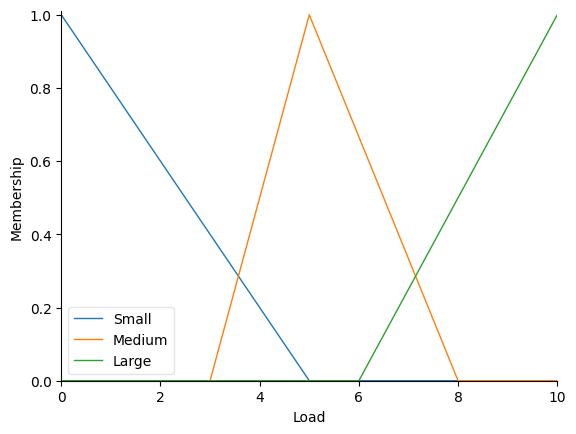

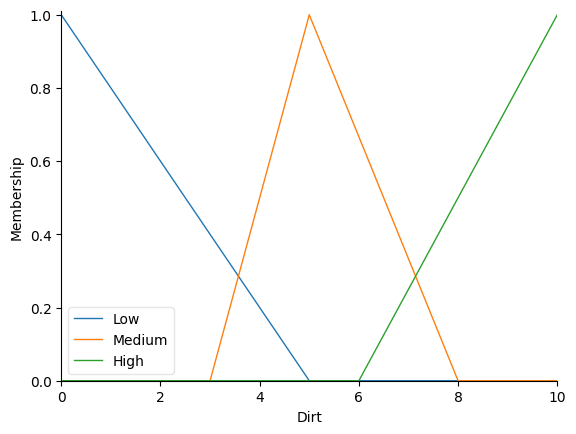

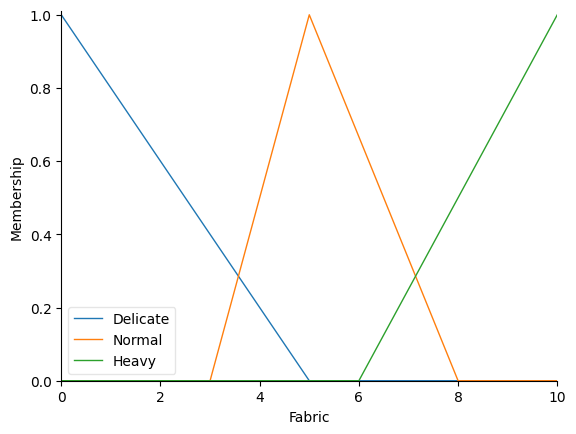

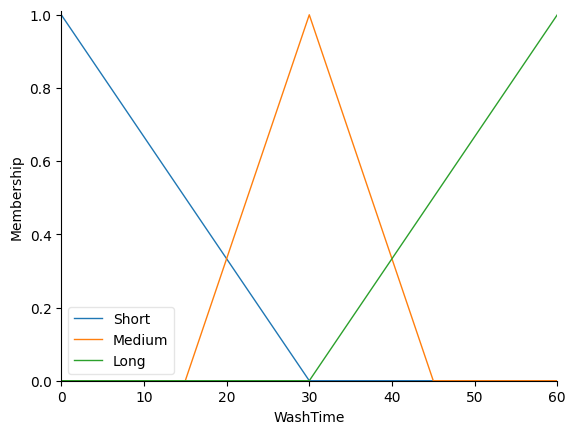

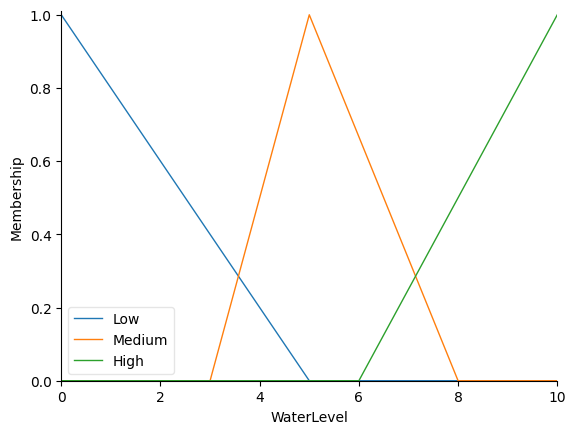

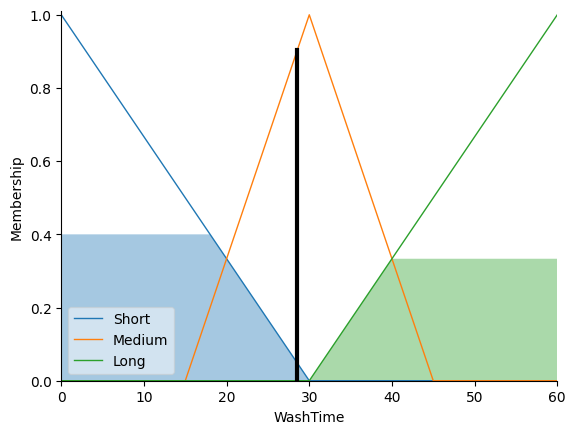

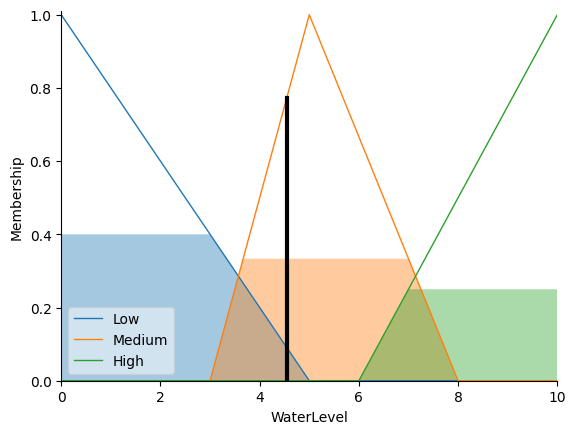

In [4]:
#máy giặt
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Load = ctrl.Antecedent(np.arange(0, 10.1, 1), 'Load')
Dirt = ctrl.Antecedent(np.arange(0, 10.1, 1), 'Dirt')
Fabric = ctrl.Antecedent(np.arange(0, 10.1, 1), 'Fabric')

WashTime = ctrl.Consequent(np.arange(0, 60.1, 1), 'WashTime')
WaterLevel = ctrl.Consequent(np.arange(0, 10.1, 1), 'WaterLevel')

Load['Small'] = fuzz.trimf(Load.universe, [0, 0, 5])
Load['Medium'] = fuzz.trimf(Load.universe, [3, 5, 8])
Load['Large'] = fuzz.trimf(Load.universe, [6, 10, 10])

Dirt['Low'] = fuzz.trimf(Dirt.universe, [0, 0, 5])
Dirt['Medium'] = fuzz.trimf(Dirt.universe, [3, 5, 8])
Dirt['High'] = fuzz.trimf(Dirt.universe, [6, 10, 10])

Fabric['Delicate'] = fuzz.trimf(Fabric.universe, [0, 0, 5])
Fabric['Normal'] = fuzz.trimf(Fabric.universe, [3, 5, 8])
Fabric['Heavy'] = fuzz.trimf(Fabric.universe, [6, 10, 10])

WashTime['Short'] = fuzz.trimf(WashTime.universe, [0, 0, 30])
WashTime['Medium'] = fuzz.trimf(WashTime.universe, [15, 30, 45])
WashTime['Long'] = fuzz.trimf(WashTime.universe, [30, 60, 60])

WaterLevel['Low'] = fuzz.trimf(WaterLevel.universe, [0, 0, 5])
WaterLevel['Medium'] = fuzz.trimf(WaterLevel.universe, [3, 5, 8])
WaterLevel['High'] = fuzz.trimf(WaterLevel.universe, [6, 10, 10])

Load.view()
Dirt.view()
Fabric.view()
WashTime.view()
WaterLevel.view()

# Định nghĩa luật mờ
rule1 = ctrl.Rule(Load['Small'] & Dirt['Low'], (WashTime['Short'], WaterLevel['Low']))
rule2 = ctrl.Rule(Load['Small'] & Dirt['Medium'], (WashTime['Medium'], WaterLevel['Medium']))
rule3 = ctrl.Rule(Load['Small'] & Dirt['High'], (WashTime['Long'], WaterLevel['Medium']))

rule4 = ctrl.Rule(Load['Medium'] & Dirt['Low'], (WashTime['Medium'], WaterLevel['Medium']))
rule5 = ctrl.Rule(Load['Medium'] & Dirt['Medium'], (WashTime['Long'], WaterLevel['Medium']))
rule6 = ctrl.Rule(Load['Medium'] & Dirt['High'], (WashTime['Long'], WaterLevel['High']))

rule7 = ctrl.Rule(Load['Large'] & Dirt['Low'], (WashTime['Medium'], WaterLevel['High']))
rule8 = ctrl.Rule(Load['Large'] & Dirt['Medium'], (WashTime['Long'], WaterLevel['High']))
rule9 = ctrl.Rule(Load['Large'] & Dirt['High'], (WashTime['Long'], WaterLevel['High']))

rule10 = ctrl.Rule(Fabric['Delicate'], (WashTime['Short'], WaterLevel['Low']))
rule11 = ctrl.Rule(Fabric['Normal'], (WashTime['Medium'], WaterLevel['Medium']))
rule12 = ctrl.Rule(Fabric['Heavy'], (WashTime['Long'], WaterLevel['High']))


washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
washing = ctrl.ControlSystemSimulation(washing_ctrl)

washing.input['Load'] = 7
washing.input['Dirt'] = 6
washing.input['Fabric'] = 3

washing.compute()

print(washing.output['WashTime'])
print(washing.output['WaterLevel'])

# Hiển thị đồ thị
WashTime.view(sim=washing)
WaterLevel.view(sim=washing)

68.39243129269943
75.80428446482244


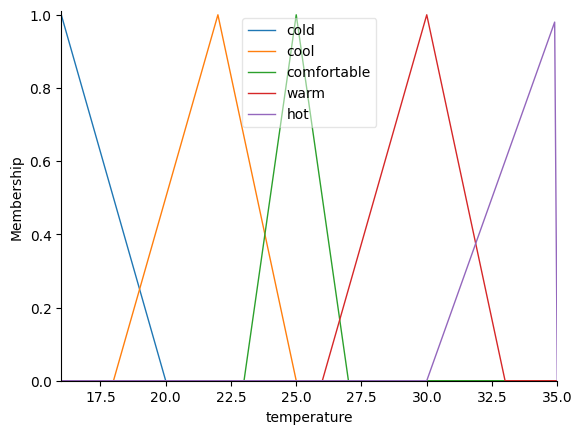

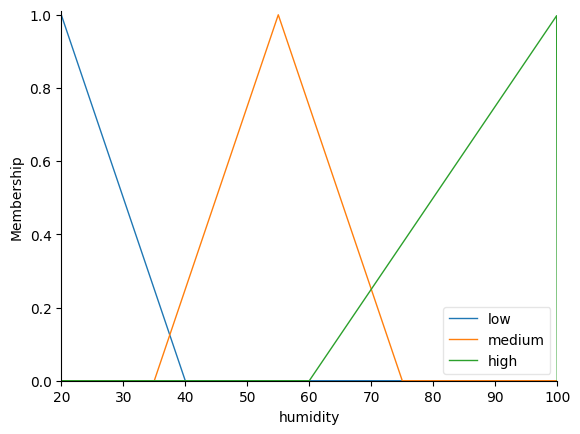

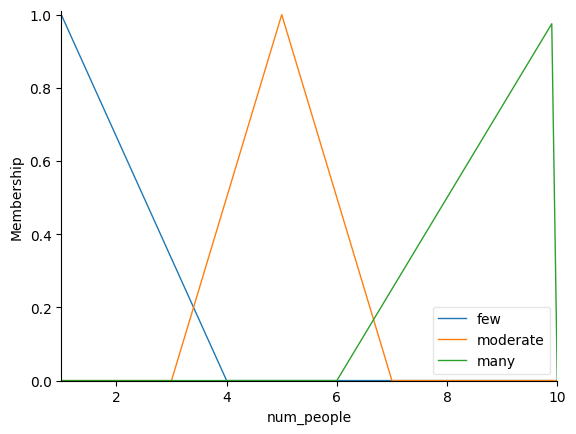

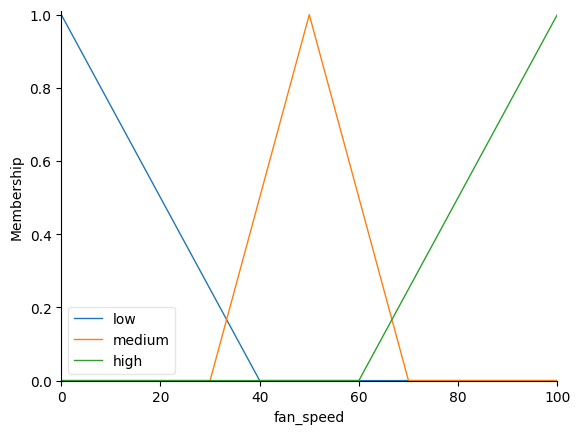

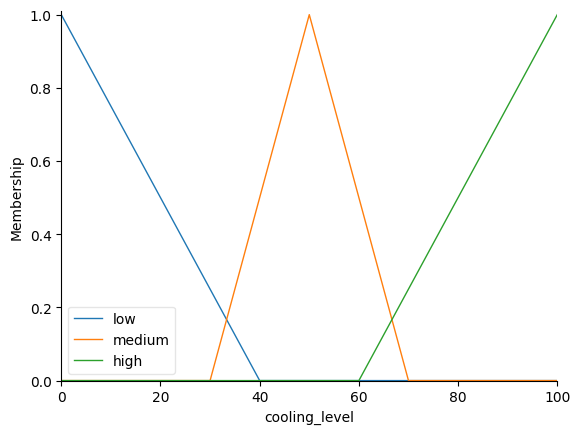

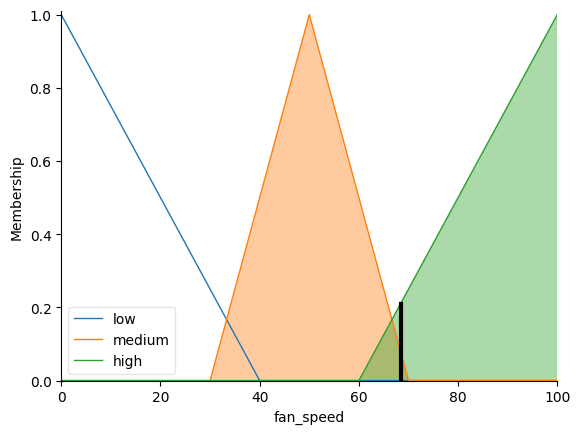

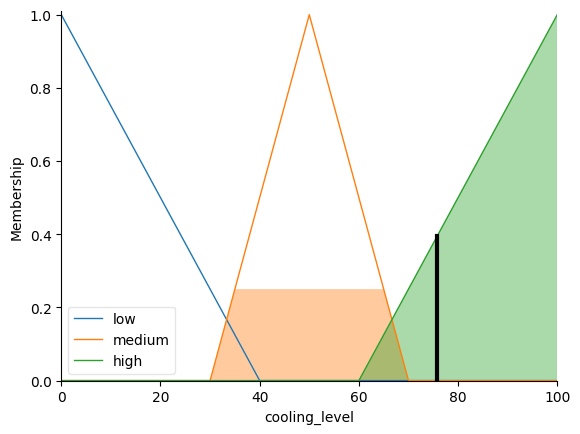

In [9]:
#máy lạnh
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Định nghĩa các biến đầu vào
temperature = ctrl.Antecedent(np.arange(16, 35.1, 0.1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 100.1, 0.1), 'humidity')
num_people = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'num_people')

# Định nghĩa các biến đầu ra
fan_speed = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'cooling_level')

# Định nghĩa các tập mờ cho đầu vào
temperature['cold'] = fuzz.trimf(temperature.universe, [16, 16, 20])
temperature['cool'] = fuzz.trimf(temperature.universe, [18, 22, 25])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [23, 25, 27])
temperature['warm'] = fuzz.trimf(temperature.universe, [26, 30, 33])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 35, 35])

humidity['low'] = fuzz.trimf(humidity.universe, [20, 20, 40])
humidity['medium'] = fuzz.trimf(humidity.universe, [35, 55, 75])
humidity['high'] = fuzz.trimf(humidity.universe, [60, 100, 100])

num_people['few'] = fuzz.trimf(num_people.universe, [1, 1, 4])
num_people['moderate'] = fuzz.trimf(num_people.universe, [3, 5, 7])
num_people['many'] = fuzz.trimf(num_people.universe, [6, 10, 10])

# Định nghĩa các tập mờ cho đầu ra
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 40])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [60, 100, 100])

cooling_level['low'] = fuzz.trimf(cooling_level.universe, [0, 0, 40])
cooling_level['medium'] = fuzz.trimf(cooling_level.universe, [30, 50, 70])
cooling_level['high'] = fuzz.trimf(cooling_level.universe, [60, 100, 100])

temperature.view()
humidity.view()
num_people.view()
fan_speed.view()
cooling_level.view()

# Xây dựng các quy tắc mờ
rule1 = ctrl.Rule(temperature['cold'], [fan_speed['low'], cooling_level['low']])
rule2 = ctrl.Rule(temperature['cool'], [fan_speed['low'], cooling_level['low']])
rule3 = ctrl.Rule(temperature['comfortable'], [fan_speed['medium'], cooling_level['medium']])
rule4 = ctrl.Rule(temperature['warm'], [fan_speed['high'], cooling_level['high']])
rule5 = ctrl.Rule(temperature['hot'], [fan_speed['high'], cooling_level['high']])

rule6 = ctrl.Rule(humidity['low'], cooling_level['low'])
rule7 = ctrl.Rule(humidity['medium'], cooling_level['medium'])
rule8 = ctrl.Rule(humidity['high'], cooling_level['high'])

rule9 = ctrl.Rule(num_people['few'], fan_speed['low'])
rule10 = ctrl.Rule(num_people['moderate'], fan_speed['medium'])
rule11 = ctrl.Rule(num_people['many'], fan_speed['high'])

rule12 = ctrl.Rule(temperature['hot'] & humidity['high'] & num_people['many'],
                   [cooling_level['high'], fan_speed['high']])
rule13 = ctrl.Rule(temperature['comfortable'] & humidity['medium'] & num_people['moderate'],
                   [cooling_level['medium'], fan_speed['medium']])
rule14 = ctrl.Rule(temperature['cool'] & humidity['low'] & num_people['few'],
                   [cooling_level['low'], fan_speed['low']])

# Tạo hệ thống điều khiển
cooling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])
cooling_system = ctrl.ControlSystemSimulation(cooling_ctrl)

# Thử nghiệm với một giá trị cụ thể
cooling_system.input['temperature'] = 30
cooling_system.input['humidity'] = 70
cooling_system.input['num_people'] = 5

# Tính toán kết quả
cooling_system.compute()

print(cooling_system.output['fan_speed'])
print(cooling_system.output['cooling_level'])
fan_speed.view(sim=cooling_system)
cooling_level.view(sim=cooling_system)

6.726963724650098
90.00000000000001


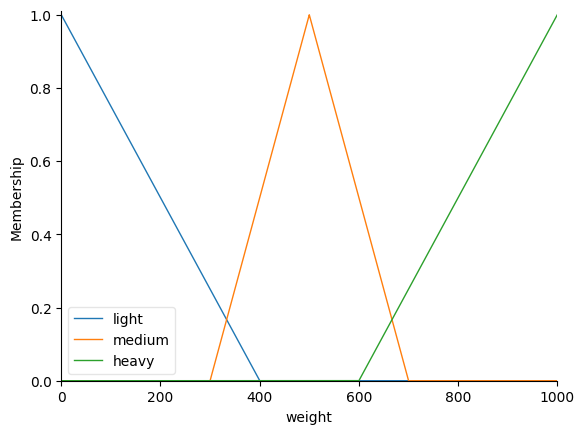

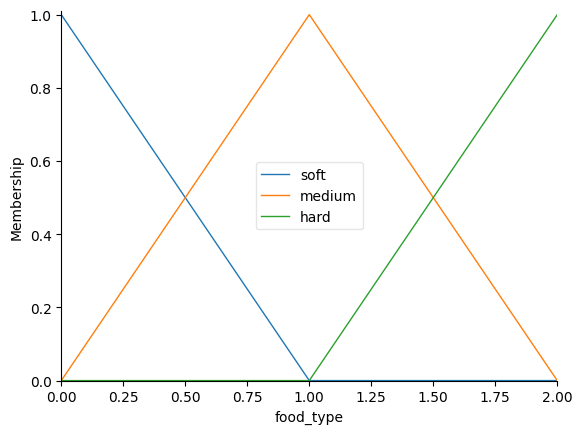

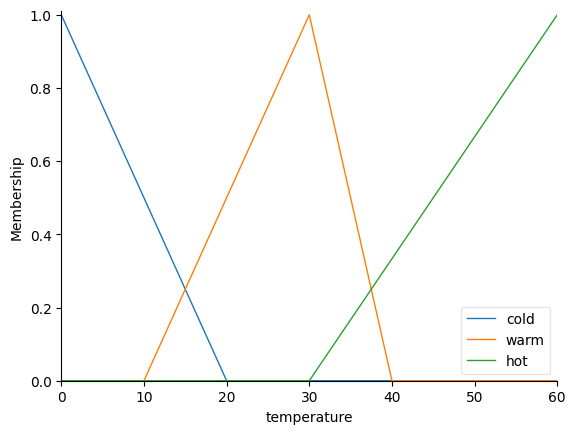

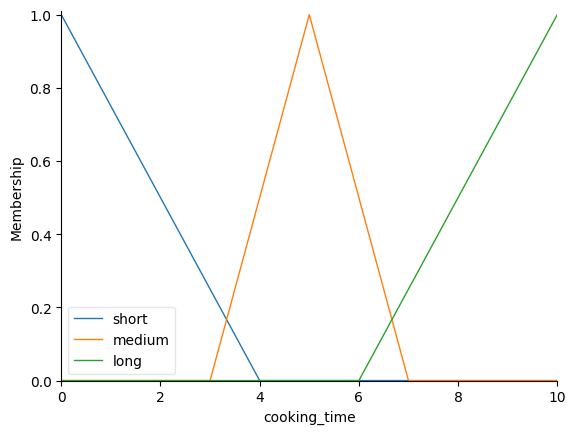

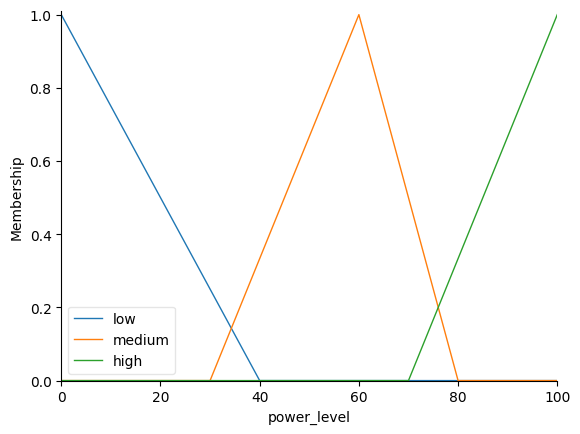

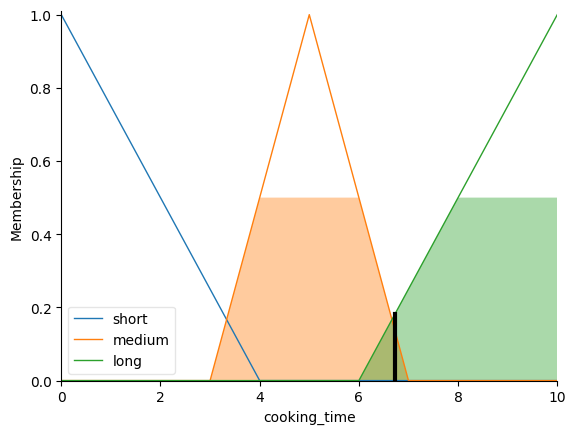

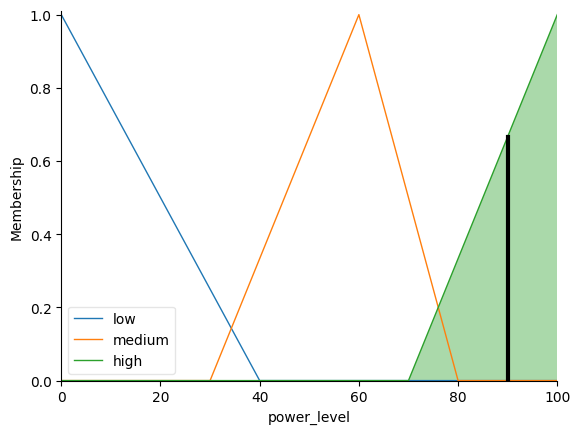

In [11]:
#lò vi sóng
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Định nghĩa các biến đầu vào
weight = ctrl.Antecedent(np.arange(0, 1000.1, 0.1), 'weight')  # Trọng lượng (g)
food_type = ctrl.Antecedent(np.arange(0, 2.1, 0.1), 'food_type')  # Loại thực phẩm (0: mềm, 1: trung bình, 2: cứng)
temperature = ctrl.Antecedent(np.arange(0, 60.1, 0.1), 'temperature')  # Nhiệt độ thực phẩm ban đầu (°C)

# Định nghĩa các biến đầu ra
cooking_time = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'cooking_time')  # Thời gian nấu (phút)
power_level = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'power_level')  # Mức công suất (%)

# Định nghĩa hàm thành viên cho trọng lượng
weight['light'] = fuzz.trimf(weight.universe, [0, 0, 400])
weight['medium'] = fuzz.trimf(weight.universe, [300, 500, 700])
weight['heavy'] = fuzz.trimf(weight.universe, [600, 1000, 1000])

# Định nghĩa hàm thành viên cho loại thực phẩm
food_type['soft'] = fuzz.trimf(food_type.universe, [0, 0, 1])
food_type['medium'] = fuzz.trimf(food_type.universe, [0, 1, 2])
food_type['hard'] = fuzz.trimf(food_type.universe, [1, 2, 2])

# Định nghĩa hàm thành viên cho nhiệt độ
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [10, 30, 40])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 60, 60])

# Định nghĩa hàm thành viên cho thời gian nấu
cooking_time['short'] = fuzz.trimf(cooking_time.universe, [0, 0, 4])
cooking_time['medium'] = fuzz.trimf(cooking_time.universe, [3, 5, 7])
cooking_time['long'] = fuzz.trimf(cooking_time.universe, [6, 10, 10])

# Định nghĩa hàm thành viên cho mức công suất
power_level['low'] = fuzz.trimf(power_level.universe, [0, 0, 40])
power_level['medium'] = fuzz.trimf(power_level.universe, [30, 60, 80])
power_level['high'] = fuzz.trimf(power_level.universe, [70, 100, 100])

weight.view()
food_type.view()
temperature.view()
cooking_time.view()
power_level.view()

# Định nghĩa các quy tắc mờ
rule1 = ctrl.Rule(weight['light'], cooking_time['short'])
rule2 = ctrl.Rule(weight['medium'], cooking_time['medium'])
rule3 = ctrl.Rule(weight['heavy'], cooking_time['long'])

rule4 = ctrl.Rule(food_type['soft'], power_level['low'])
rule5 = ctrl.Rule(food_type['medium'], power_level['medium'])
rule6 = ctrl.Rule(food_type['hard'], power_level['high'])

rule7 = ctrl.Rule(temperature['cold'], cooking_time['long'])
rule8 = ctrl.Rule(temperature['warm'], cooking_time['medium'])
rule9 = ctrl.Rule(temperature['hot'], cooking_time['short'])

rule10 = ctrl.Rule(weight['heavy'] & food_type['hard'] & temperature['cold'],
                    [cooking_time['long'], power_level['high']])
rule11 = ctrl.Rule(weight['medium'] & food_type['soft'] & temperature['warm'],
                    [cooking_time['medium'], power_level['low']])
rule12 = ctrl.Rule(weight['light'] & food_type['medium'] & temperature['hot'],
                    [cooking_time['short'], power_level['medium']])

# Tạo hệ thống điều khiển mờ
cooking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                                   rule7, rule8, rule9, rule10, rule11, rule12])
cooking_sim = ctrl.ControlSystemSimulation(cooking_ctrl)

# Đặt giá trị đầu vào
test_weight = 600
test_food_type = 2  # Hard
test_temperature = 10  # Cold

cooking_sim.input['weight'] = test_weight
cooking_sim.input['food_type'] = test_food_type
cooking_sim.input['temperature'] = test_temperature

# Tính toán kết quả
cooking_sim.compute()

# In kết quả
print(cooking_sim.output['cooking_time'])
print(cooking_sim.output['power_level'])
cooking_time.view(sim=cooking_sim)
power_level.view(sim=cooking_sim)


8.775000000000002
8.621212121212123
8.775000000000002


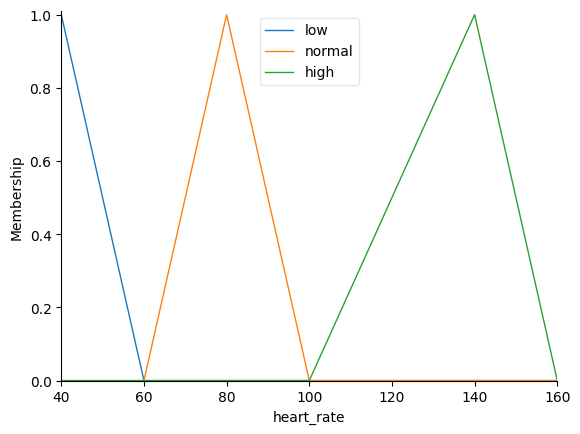

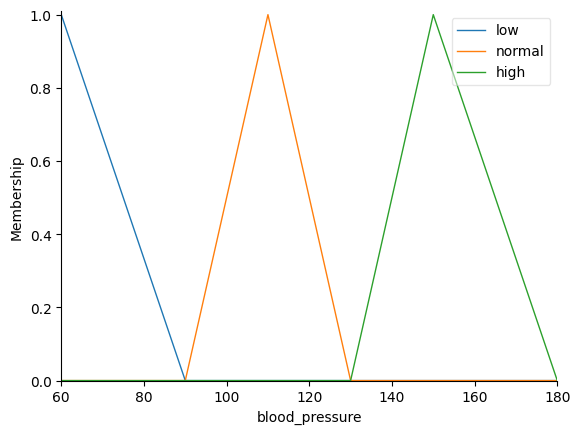

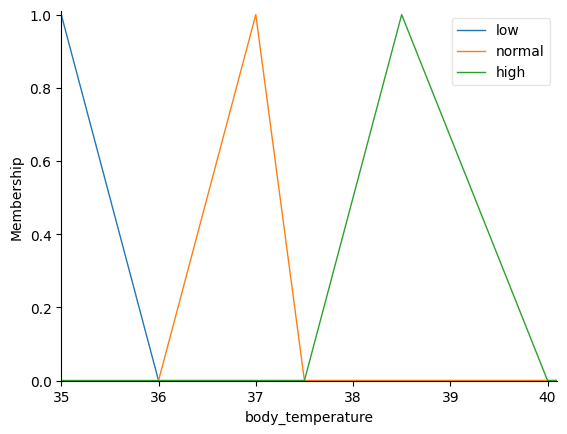

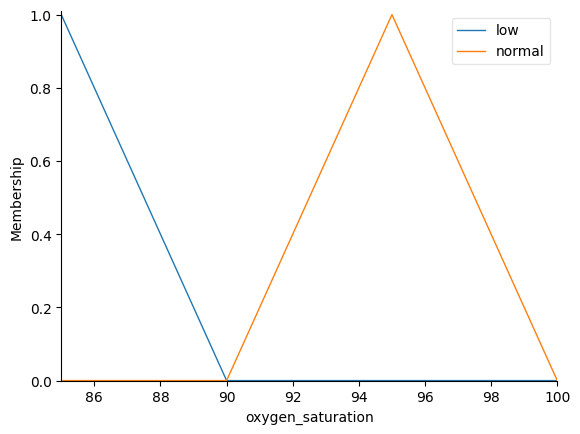

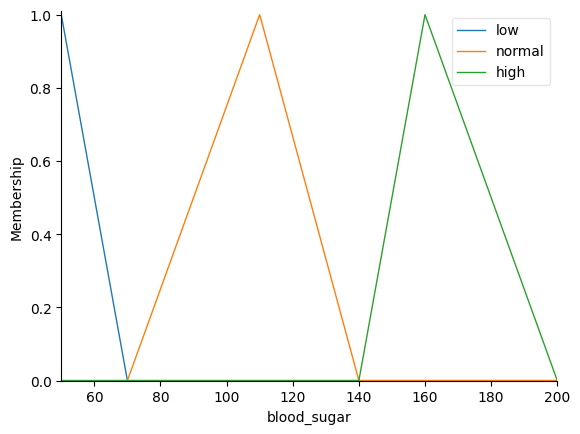

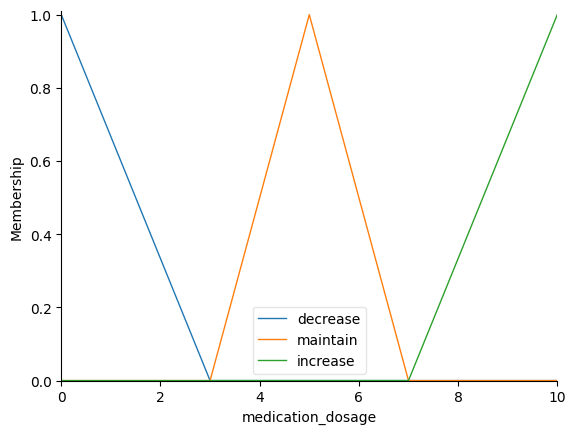

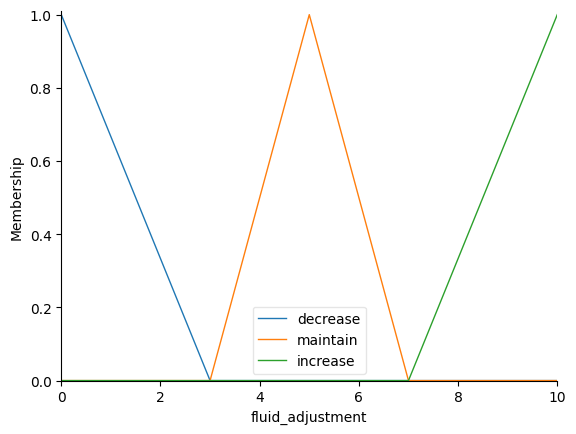

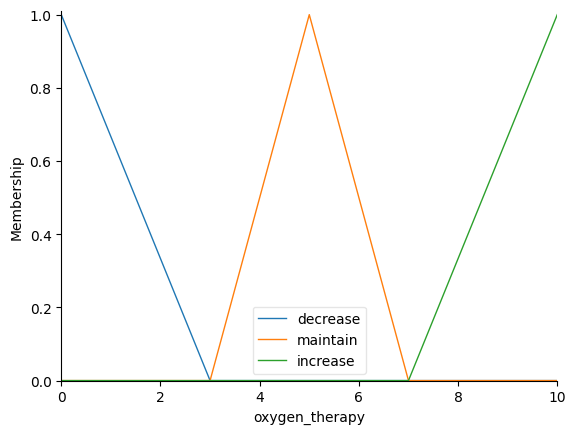

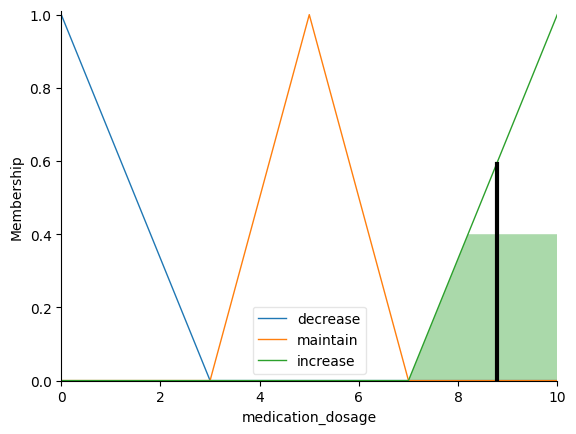

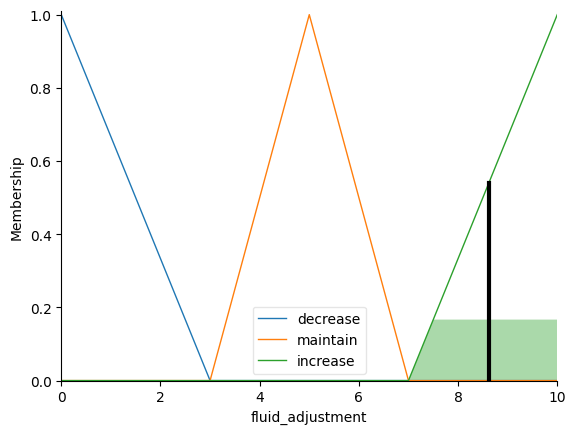

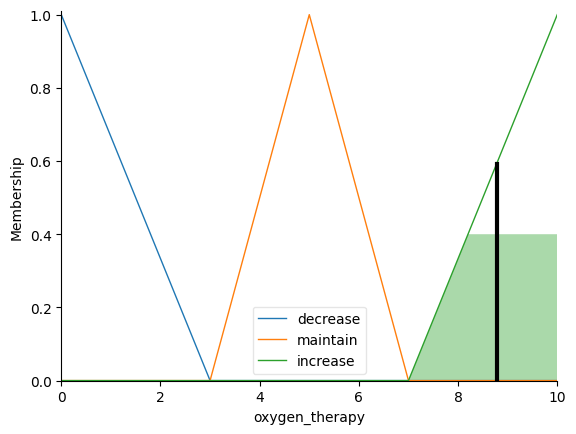

In [13]:
#theo doi benh nhan
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Định nghĩa các biến đầu vào (Input)
heart_rate = ctrl.Antecedent(np.arange(40, 160.1, 0.1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(60, 180.1, 0.1), 'blood_pressure')
body_temperature = ctrl.Antecedent(np.arange(35, 40.1, 0.1), 'body_temperature')
oxygen_saturation = ctrl.Antecedent(np.arange(85, 100.1, 0.1), 'oxygen_saturation')
blood_sugar = ctrl.Antecedent(np.arange(50, 200.1, 0.1), 'blood_sugar')

# Định nghĩa các biến đầu ra (Output)
medication_dosage = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'medication_dosage')
fluid_adjustment = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'fluid_adjustment')
oxygen_therapy = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'oxygen_therapy')

# Định nghĩa tập mờ cho các biến đầu vào
heart_rate['low'] = fuzz.trimf(heart_rate.universe, [40, 40, 60])
heart_rate['normal'] = fuzz.trimf(heart_rate.universe, [60, 80, 100])
heart_rate['high'] = fuzz.trimf(heart_rate.universe, [100, 140, 160])

blood_pressure['low'] = fuzz.trimf(blood_pressure.universe, [60, 60, 90])
blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [90, 110, 130])
blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [130, 150, 180])

body_temperature['low'] = fuzz.trimf(body_temperature.universe, [35, 35, 36])
body_temperature['normal'] = fuzz.trimf(body_temperature.universe, [36, 37, 37.5])
body_temperature['high'] = fuzz.trimf(body_temperature.universe, [37.5, 38.5, 40])

oxygen_saturation['low'] = fuzz.trimf(oxygen_saturation.universe, [85, 85, 90])
oxygen_saturation['normal'] = fuzz.trimf(oxygen_saturation.universe, [90, 95, 100])

blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [50, 50, 70])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [70, 110, 140])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [140, 160, 200])

# Định nghĩa tập mờ cho các biến đầu ra
medication_dosage['decrease'] = fuzz.trimf(medication_dosage.universe, [0, 0, 3])
medication_dosage['maintain'] = fuzz.trimf(medication_dosage.universe, [3, 5, 7])
medication_dosage['increase'] = fuzz.trimf(medication_dosage.universe, [7, 10, 10])

fluid_adjustment['decrease'] = fuzz.trimf(fluid_adjustment.universe, [0, 0, 3])
fluid_adjustment['maintain'] = fuzz.trimf(fluid_adjustment.universe, [3, 5, 7])
fluid_adjustment['increase'] = fuzz.trimf(fluid_adjustment.universe, [7, 10, 10])

oxygen_therapy['decrease'] = fuzz.trimf(oxygen_therapy.universe, [0, 0, 3])
oxygen_therapy['maintain'] = fuzz.trimf(oxygen_therapy.universe, [3, 5, 7])
oxygen_therapy['increase'] = fuzz.trimf(oxygen_therapy.universe, [7, 10, 10])

heart_rate.view()
blood_pressure.view()
body_temperature.view()
oxygen_saturation.view()
blood_sugar.view()
medication_dosage.view()
fluid_adjustment.view()
oxygen_therapy.view()

# Định nghĩa các quy tắc mờ
rule1 = ctrl.Rule(heart_rate['low'] & blood_pressure['low'], (fluid_adjustment['increase'], medication_dosage['increase']))
rule2 = ctrl.Rule(heart_rate['high'] & blood_pressure['high'], medication_dosage['decrease'])
rule3 = ctrl.Rule(heart_rate['normal'] & blood_pressure['normal'], medication_dosage['maintain'])
rule4 = ctrl.Rule(body_temperature['high'] & oxygen_saturation['low'], (oxygen_therapy['increase'], medication_dosage['increase']))
rule5 = ctrl.Rule(body_temperature['low'] & oxygen_saturation['low'], (oxygen_therapy['increase'], fluid_adjustment['increase']))
rule6 = ctrl.Rule(blood_sugar['high'], medication_dosage['increase'])
rule7 = ctrl.Rule(blood_sugar['low'], medication_dosage['decrease'])
rule8 = ctrl.Rule(blood_pressure['high'] & blood_sugar['high'] & heart_rate['high'], medication_dosage['decrease'])
rule9 = ctrl.Rule(blood_pressure['low'] & oxygen_saturation['low'] & heart_rate['low'], (fluid_adjustment['increase'], oxygen_therapy['increase'], medication_dosage['increase']))
rule10 = ctrl.Rule(body_temperature['high'] & blood_pressure['high'] & oxygen_saturation['normal'], medication_dosage['increase'])

# Tạo hệ thống điều khiển
health_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
health_simulation = ctrl.ControlSystemSimulation(health_ctrl)

# Đặt giá trị đầu vào
health_simulation.input['heart_rate']= 55
health_simulation.input['blood_pressure']= 85
health_simulation.input['body_temperature']= 39
health_simulation.input['oxygen_saturation']= 88
health_simulation.input['blood_sugar']= 190

health_simulation.compute()

print(health_simulation.output['medication_dosage'])
print(health_simulation.output['fluid_adjustment'])
print(health_simulation.output['oxygen_therapy'])

medication_dosage.view(sim=health_simulation)
fluid_adjustment.view(sim=health_simulation)
oxygen_therapy.view(sim=health_simulation)



0.12666666666666668


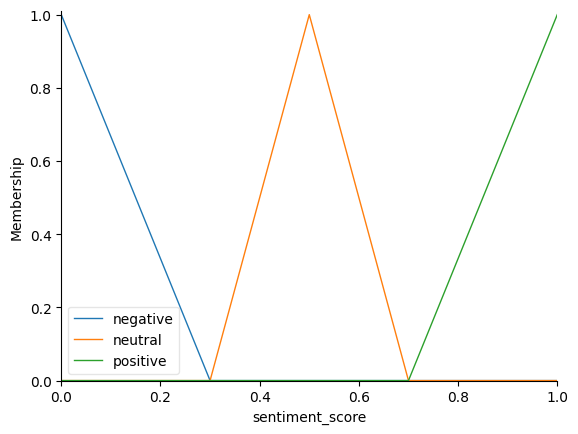

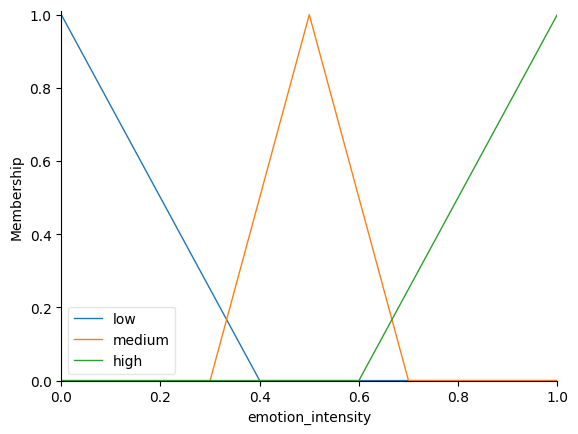

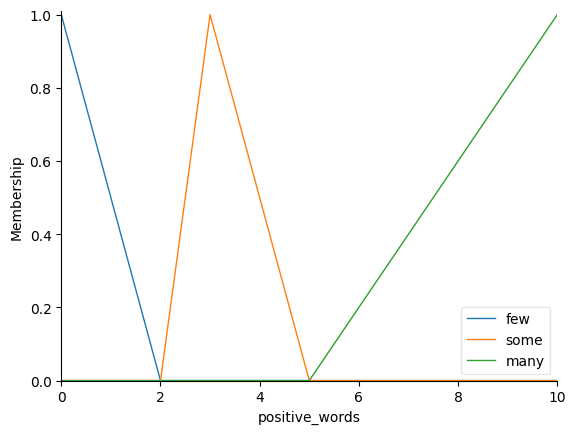

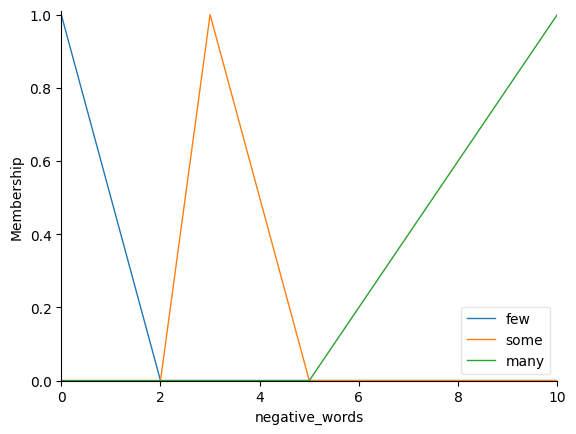

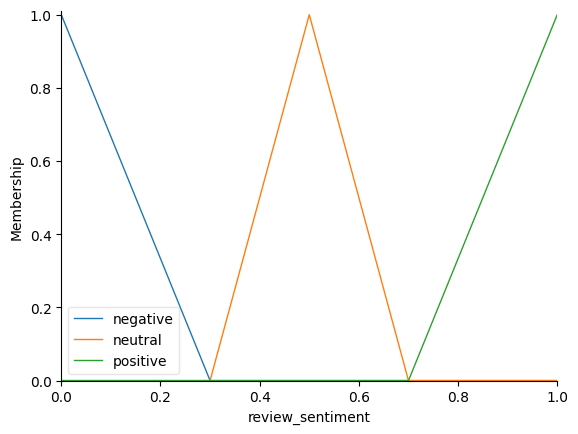

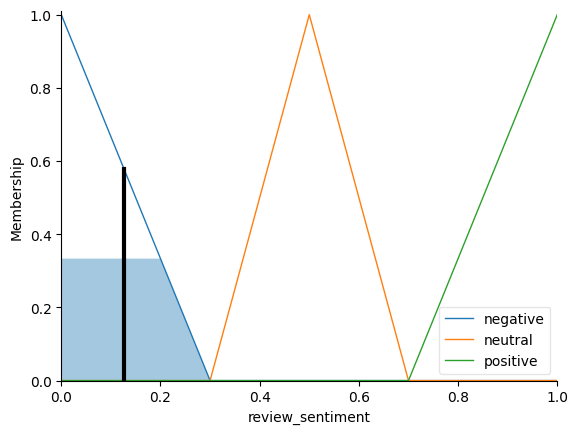

In [15]:
#phân tích phản hồi
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Định nghĩa các biến đầu vào
sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sentiment_score')
emotion_intensity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'emotion_intensity')
positive_words = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'positive_words')
negative_words = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'negative_words')

# Định nghĩa biến đầu ra
review_sentiment = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'review_sentiment')

# Hàm thành viên cho điểm cảm xúc
sentiment_score['negative'] = fuzz.trimf(sentiment_score.universe, [0, 0, 0.3])
sentiment_score['neutral'] = fuzz.trimf(sentiment_score.universe, [0.3, 0.5, 0.7])
sentiment_score['positive'] = fuzz.trimf(sentiment_score.universe, [0.7, 1, 1])

# Hàm thành viên cho cường độ cảm xúc
emotion_intensity['low'] = fuzz.trimf(emotion_intensity.universe, [0, 0, 0.4])
emotion_intensity['medium'] = fuzz.trimf(emotion_intensity.universe, [0.3, 0.5, 0.7])
emotion_intensity['high'] = fuzz.trimf(emotion_intensity.universe, [0.6, 1, 1])

# Hàm thành viên cho số lượng từ tích cực
positive_words['few'] = fuzz.trimf(positive_words.universe, [0, 0, 2])
positive_words['some'] = fuzz.trimf(positive_words.universe, [2, 3, 5])
positive_words['many'] = fuzz.trimf(positive_words.universe, [5, 10, 10])

# Hàm thành viên cho số lượng từ tiêu cực
negative_words['few'] = fuzz.trimf(negative_words.universe, [0, 0, 2])
negative_words['some'] = fuzz.trimf(negative_words.universe, [2, 3, 5])
negative_words['many'] = fuzz.trimf(negative_words.universe, [5, 10, 10])

# Hàm thành viên cho phân loại cảm xúc đánh giá
review_sentiment['negative'] = fuzz.trimf(review_sentiment.universe, [0, 0, 0.3])
review_sentiment['neutral'] = fuzz.trimf(review_sentiment.universe, [0.3, 0.5, 0.7])
review_sentiment['positive'] = fuzz.trimf(review_sentiment.universe, [0.7, 1, 1])

sentiment_score.view()
emotion_intensity.view()
positive_words.view()
negative_words.view()
review_sentiment.view()

# Định nghĩa luật mờ
rule1 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['high'], review_sentiment['negative'])
rule2 = ctrl.Rule(sentiment_score['negative'] & emotion_intensity['low'], review_sentiment['neutral'])
rule3 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'], review_sentiment['neutral'])
rule4 = ctrl.Rule(sentiment_score['positive'] & emotion_intensity['high'], review_sentiment['positive'])

rule5 = ctrl.Rule(positive_words['many'] & negative_words['few'], review_sentiment['positive'])
rule6 = ctrl.Rule(positive_words['few'] & negative_words['many'], review_sentiment['negative'])
rule7 = ctrl.Rule(positive_words['some'] & negative_words['some'], review_sentiment['neutral'])

rule8 = ctrl.Rule(sentiment_score['negative'] & negative_words['many'] & emotion_intensity['high'], review_sentiment['negative'])
rule9 = ctrl.Rule(sentiment_score['neutral'] & emotion_intensity['medium'] & positive_words['some'], review_sentiment['neutral'])
rule10 = ctrl.Rule(sentiment_score['positive'] & positive_words['many'] & emotion_intensity['high'], review_sentiment['positive'])

# Tạo hệ thống điều khiển mờ
review_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
review_simulation = ctrl.ControlSystemSimulation(review_ctrl)


review_simulation.input['sentiment_score'] = 0.2
review_simulation.input['emotion_intensity'] = 0.8
review_simulation.input['positive_words'] = 1
review_simulation.input['negative_words'] = 6

review_simulation.compute()

print(review_simulation.output['review_sentiment'])

review_sentiment.view(sim=review_simulation)


17.422222222222214
87.3333333333334
1.4222222222222223


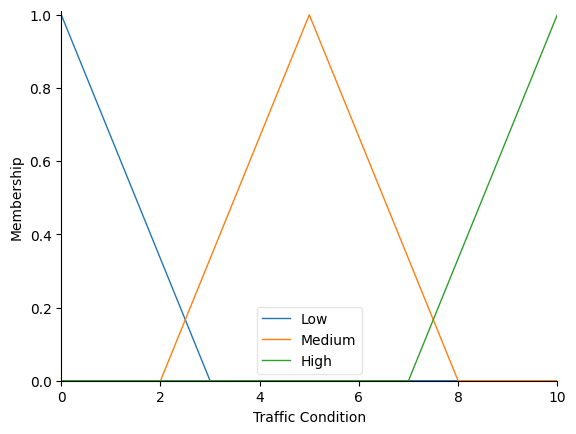

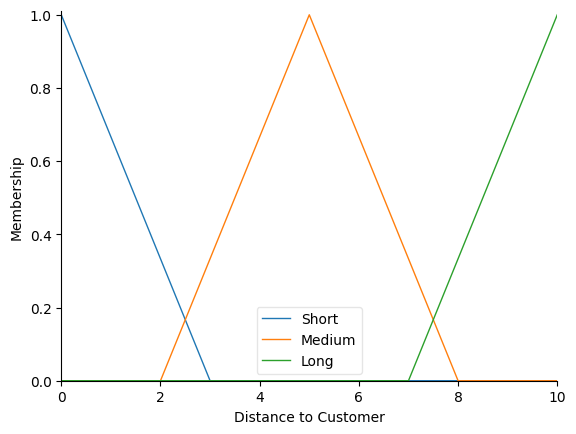

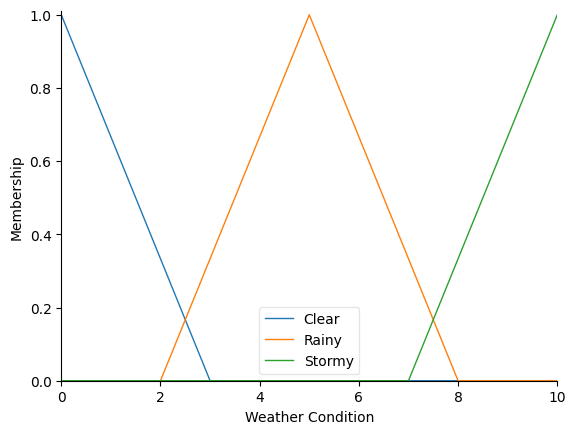

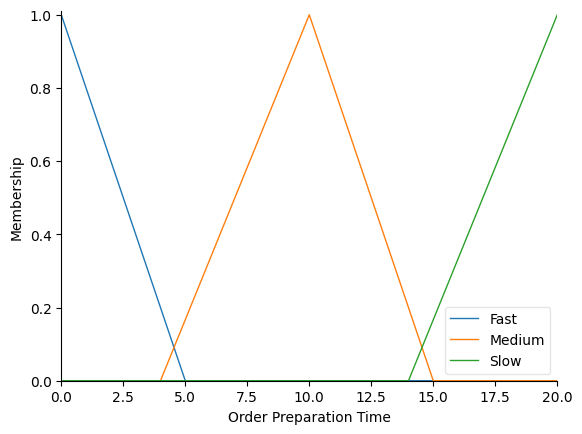

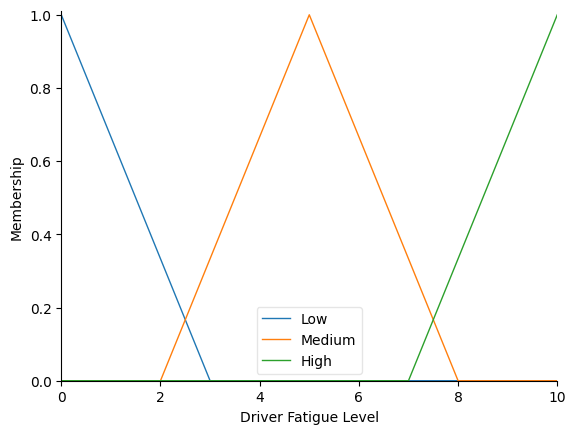

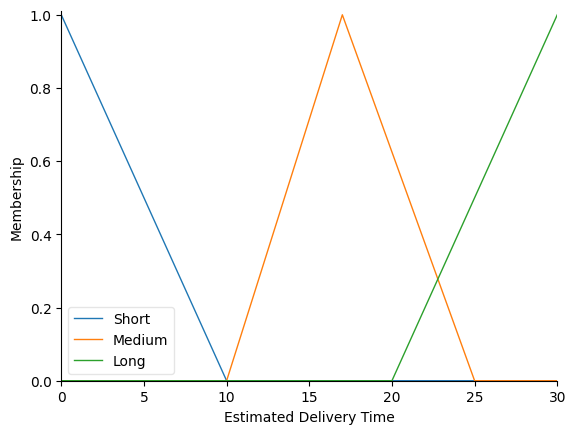

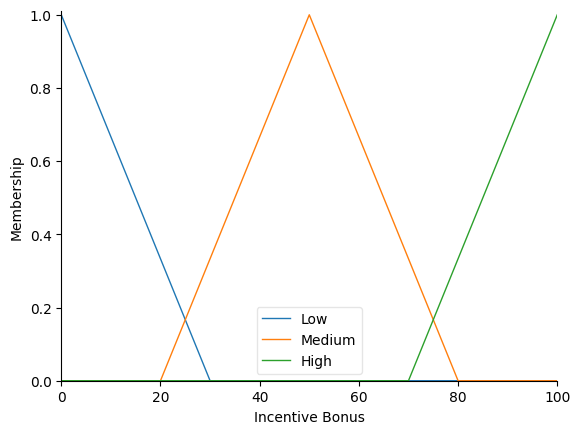

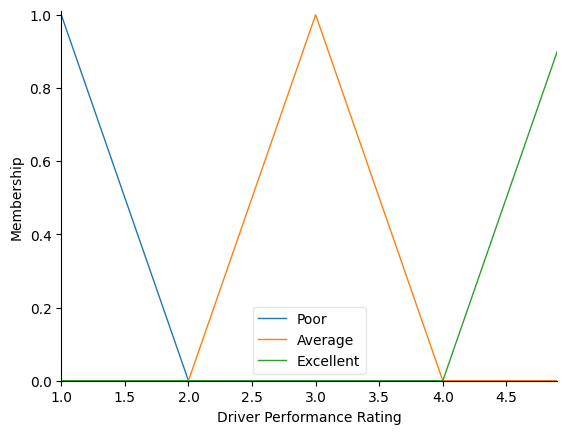

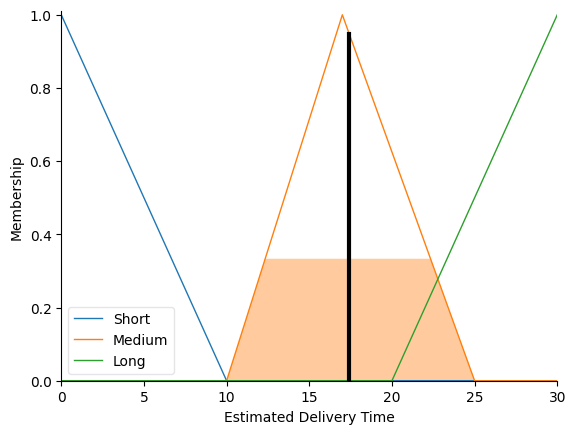

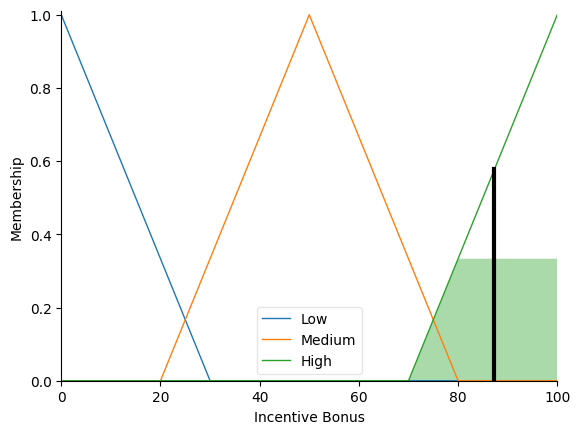

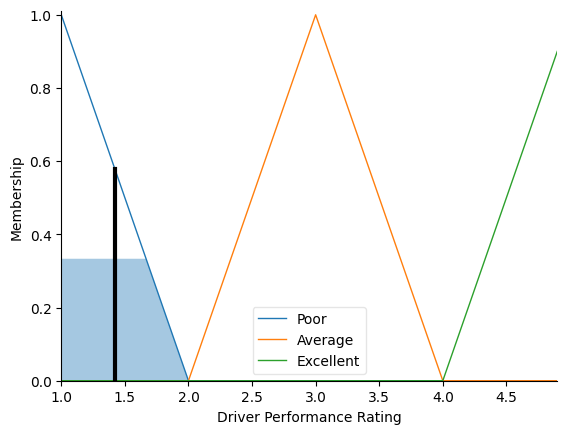

In [25]:
#grab thử 1
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Khai báo các biến đầu vào mờ
traffic = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Traffic Condition')
distance = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Distance to Customer')
weather = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Weather Condition')
prep_time = ctrl.Antecedent(np.arange(0, 20.1, 0.1), 'Order Preparation Time')
fatigue = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Driver Fatigue Level')

# Khai báo các biến đầu ra mờ
delivery_time = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'Estimated Delivery Time')
bonus = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'Incentive Bonus')
performance = ctrl.Consequent(np.arange(1, 5, 0.1), 'Driver Performance Rating')

# Định nghĩa hàm thành viên cho các biến đầu vào
traffic['Low'] = fuzz.trimf(traffic.universe, [0, 0, 3])
traffic['Medium'] = fuzz.trimf(traffic.universe, [2, 5, 8])
traffic['High'] = fuzz.trimf(traffic.universe, [7, 10, 10])

distance['Short'] = fuzz.trimf(distance.universe, [0, 0, 3])
distance['Medium'] = fuzz.trimf(distance.universe, [2, 5, 8])
distance['Long'] = fuzz.trimf(distance.universe, [7, 10, 10])

weather['Clear'] = fuzz.trimf(weather.universe, [0, 0, 3])
weather['Rainy'] = fuzz.trimf(weather.universe, [2, 5, 8])
weather['Stormy'] = fuzz.trimf(weather.universe, [7, 10, 10])

prep_time['Fast'] = fuzz.trimf(prep_time.universe, [0, 0, 5])
prep_time['Medium'] = fuzz.trimf(prep_time.universe, [4, 10, 15])
prep_time['Slow'] = fuzz.trimf(prep_time.universe, [14, 20, 20])

fatigue['Low'] = fuzz.trimf(fatigue.universe, [0, 0, 3])
fatigue['Medium'] = fuzz.trimf(fatigue.universe, [2, 5, 8])
fatigue['High'] = fuzz.trimf(fatigue.universe, [7, 10, 10])

# Định nghĩa hàm thành viên cho các biến đầu ra
delivery_time['Short'] = fuzz.trimf(delivery_time.universe, [0, 0, 10])
delivery_time['Medium'] = fuzz.trimf(delivery_time.universe, [10, 17, 25])
delivery_time['Long'] = fuzz.trimf(delivery_time.universe, [20, 30, 30])

bonus['Low'] = fuzz.trimf(bonus.universe, [0, 0, 30])
bonus['Medium'] = fuzz.trimf(bonus.universe, [20, 50, 80])
bonus['High'] = fuzz.trimf(bonus.universe, [70, 100, 100])

performance['Poor'] = fuzz.trimf(performance.universe, [1, 1, 2])
performance['Average'] = fuzz.trimf(performance.universe, [2, 3, 4])
performance['Excellent'] = fuzz.trimf(performance.universe, [4, 5, 5])

traffic.view()
distance.view()
weather.view()
prep_time.view()
fatigue.view()
delivery_time.view()
bonus.view()
performance.view()

# Xây dựng tập luật mờ
rule1 = ctrl.Rule(traffic['Low'] & distance['Short'], delivery_time['Short'])
rule2 = ctrl.Rule(traffic['Medium'] & distance['Medium'], delivery_time['Medium'])
rule3 = ctrl.Rule(traffic['High'] & distance['Long'], delivery_time['Long'])

rule4 = ctrl.Rule(weather['Clear'], bonus['Low'])
rule5 = ctrl.Rule(weather['Rainy'], bonus['Medium'])
rule6 = ctrl.Rule(weather['Stormy'], bonus['High'])

rule7 = ctrl.Rule(prep_time['Fast'] & traffic['Low'], delivery_time['Short'])
rule8 = ctrl.Rule(prep_time['Medium'] & traffic['Medium'], delivery_time['Medium'])
rule9 = ctrl.Rule(prep_time['Slow'] & traffic['High'], delivery_time['Long'])

rule10 = ctrl.Rule(fatigue['Low'], performance['Excellent'])
rule11 = ctrl.Rule(fatigue['Medium'], performance['Average'])
rule12 = ctrl.Rule(fatigue['High'], performance['Poor'])

rule13 = ctrl.Rule(distance['Long'] & weather['Stormy'] & traffic['High'],
                   (delivery_time['Long'], bonus['High']))
rule14 = ctrl.Rule(distance['Short'] & weather['Clear'] & traffic['Low'],
                   (delivery_time['Short'], bonus['Low']))
rule15 = ctrl.Rule(fatigue['High'] & traffic['High'],
                   (performance['Poor'],delivery_time['Long']))

# Tạo hệ thống điều khiển
delivery_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule7, rule8, rule9, rule13, rule14, rule15])
bonus_ctrl = ctrl.ControlSystem([rule4, rule5, rule6, rule13, rule14])
performance_ctrl = ctrl.ControlSystem([rule10, rule11, rule12, rule15])

# Mô phỏng hệ thống
delivery_sim = ctrl.ControlSystemSimulation(delivery_ctrl)
bonus_sim = ctrl.ControlSystemSimulation(bonus_ctrl)
performance_sim = ctrl.ControlSystemSimulation(performance_ctrl)

# Gán giá trị đầu vào
delivery_sim.input['Traffic Condition'] = 7  # Giao thông đông đúc
delivery_sim.input['Distance to Customer'] = 9  # Khoảng cách xa
delivery_sim.input['Order Preparation Time'] = 10  # Thời gian chuẩn bị trung bình

bonus_sim.input['Weather Condition'] = 8

performance_sim.input['Driver Fatigue Level'] = 8

# Tính toán đầu ra
delivery_sim.compute()
bonus_sim.compute()
performance_sim.compute()

# In kết quả
print(delivery_sim.output['Estimated Delivery Time'])
print(bonus_sim.output['Incentive Bonus'])
print(performance_sim.output['Driver Performance Rating'])

delivery_time.view(sim=delivery_sim)
bonus.view(sim=bonus_sim)
performance.view(performance_sim)

17.422222222222214
87.3333333333334
1.4222222222222223


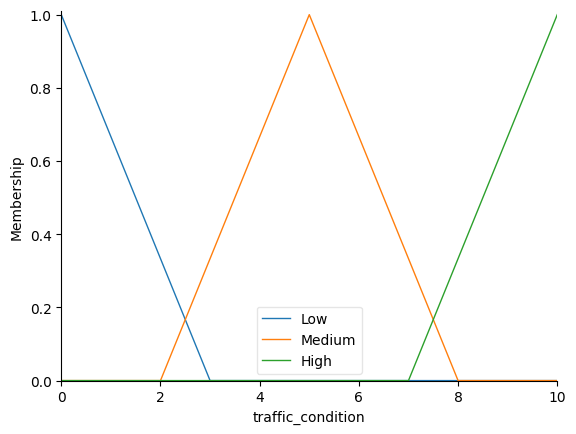

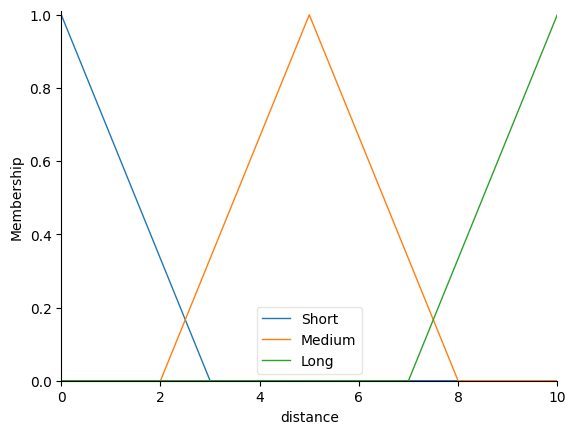

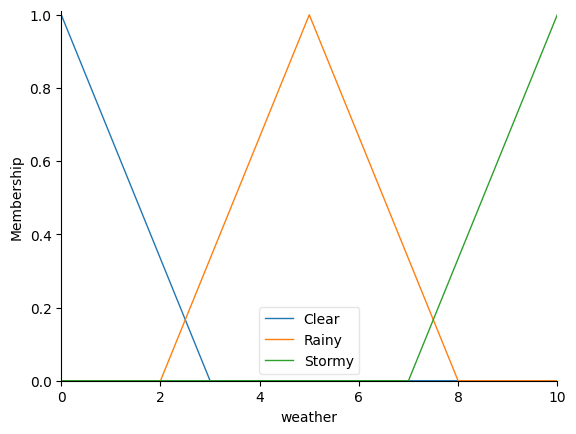

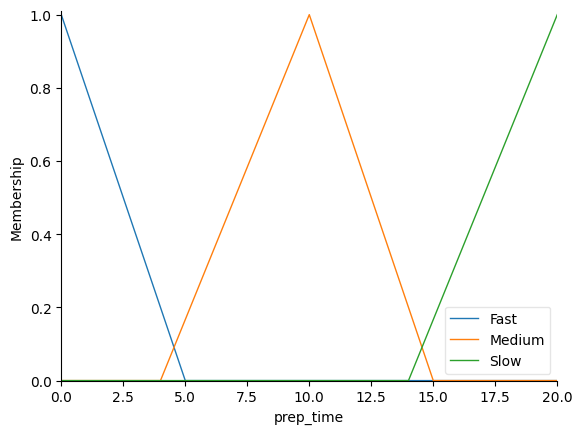

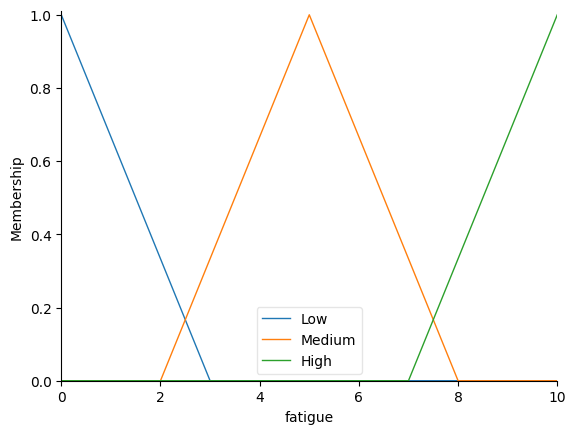

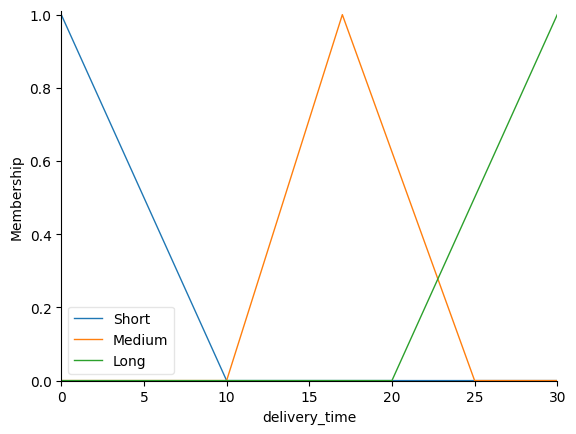

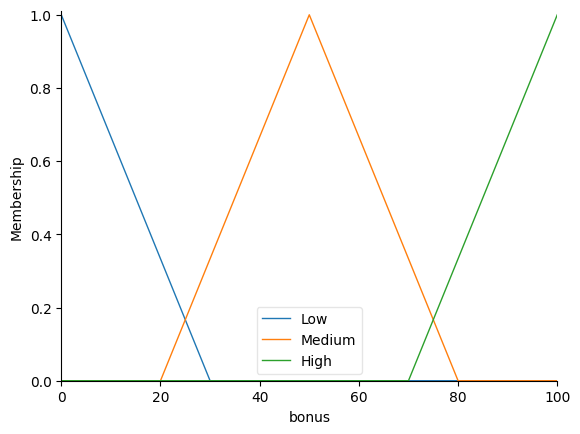

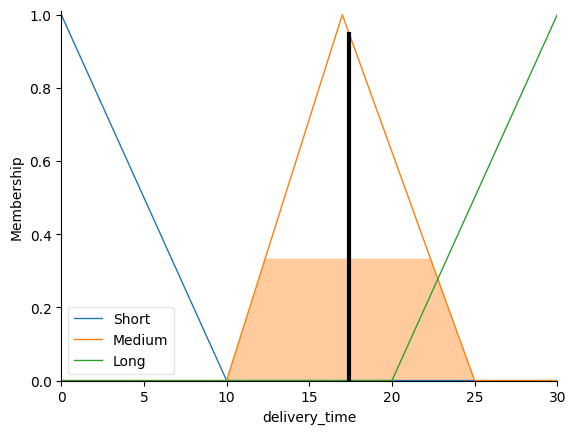

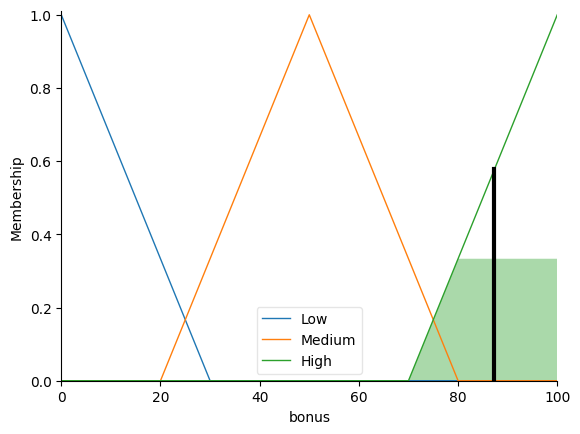

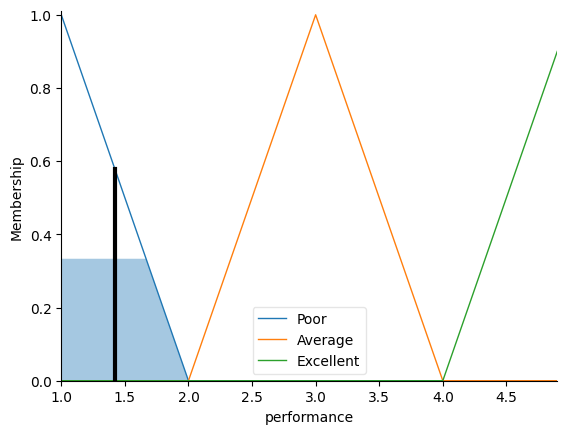

In [24]:
#grab thử 2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Khai báo các biến đầu vào mờ
traffic_condition = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'traffic_condition')
distance = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'distance')
weather = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'weather')
prep_time = ctrl.Antecedent(np.arange(0, 20.1, 0.1), 'prep_time')
fatigue = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'fatigue')

# Khai báo các biến đầu ra mờ
delivery_time = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'delivery_time')
bonus = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'bonus')
performance = ctrl.Consequent(np.arange(1, 5, 0.1), 'performance')

# Định nghĩa hàm thành viên cho các biến đầu vào
traffic_condition['Low'] = fuzz.trimf(traffic_condition.universe, [0, 0, 3])
traffic_condition['Medium'] = fuzz.trimf(traffic_condition.universe, [2, 5, 8])
traffic_condition['High'] = fuzz.trimf(traffic_condition.universe, [7, 10, 10])

distance['Short'] = fuzz.trimf(distance.universe, [0, 0, 3])
distance['Medium'] = fuzz.trimf(distance.universe, [2, 5, 8])
distance['Long'] = fuzz.trimf(distance.universe, [7, 10, 10])

weather['Clear'] = fuzz.trimf(weather.universe, [0, 0, 3])
weather['Rainy'] = fuzz.trimf(weather.universe, [2, 5, 8])
weather['Stormy'] = fuzz.trimf(weather.universe, [7, 10, 10])

prep_time['Fast'] = fuzz.trimf(prep_time.universe, [0, 0, 5])
prep_time['Medium'] = fuzz.trimf(prep_time.universe, [4, 10, 15])
prep_time['Slow'] = fuzz.trimf(prep_time.universe, [14, 20, 20])

fatigue['Low'] = fuzz.trimf(fatigue.universe, [0, 0, 3])
fatigue['Medium'] = fuzz.trimf(fatigue.universe, [2, 5, 8])
fatigue['High'] = fuzz.trimf(fatigue.universe, [7, 10, 10])

# Định nghĩa hàm thành viên cho các biến đầu ra
delivery_time['Short'] = fuzz.trimf(delivery_time.universe, [0, 0, 10])
delivery_time['Medium'] = fuzz.trimf(delivery_time.universe, [10, 17, 25])
delivery_time['Long'] = fuzz.trimf(delivery_time.universe, [20, 30, 30])

bonus['Low'] = fuzz.trimf(bonus.universe, [0, 0, 30])
bonus['Medium'] = fuzz.trimf(bonus.universe, [20, 50, 80])
bonus['High'] = fuzz.trimf(bonus.universe, [70, 100, 100])

performance['Poor'] = fuzz.trimf(performance.universe, [1, 1, 2])
performance['Average'] = fuzz.trimf(performance.universe, [2, 3, 4])
performance['Excellent'] = fuzz.trimf(performance.universe, [4, 5, 5])

traffic_condition.view()
distance.view()
weather.view()
prep_time.view()
fatigue.view()
delivery_time.view()
bonus.view()
performance.view()

# Xây dựng tập luật mờ
rule1 = ctrl.Rule(traffic_condition['Low'] & distance['Short'], delivery_time['Short'])
rule2 = ctrl.Rule(traffic_condition['Medium'] & distance['Medium'], delivery_time['Medium'])
rule3 = ctrl.Rule(traffic_condition['High'] & distance['Long'], delivery_time['Long'])

rule4 = ctrl.Rule(weather['Clear'], bonus['Low'])
rule5 = ctrl.Rule(weather['Rainy'], bonus['Medium'])
rule6 = ctrl.Rule(weather['Stormy'], bonus['High'])

rule7 = ctrl.Rule(prep_time['Fast'] & traffic_condition['Low'], delivery_time['Short'])
rule8 = ctrl.Rule(prep_time['Medium'] & traffic_condition['Medium'], delivery_time['Medium'])
rule9 = ctrl.Rule(prep_time['Slow'] & traffic_condition['High'], delivery_time['Long'])

rule10 = ctrl.Rule(fatigue['Low'], performance['Excellent'])
rule11 = ctrl.Rule(fatigue['Medium'], performance['Average'])
rule12 = ctrl.Rule(fatigue['High'], performance['Poor'])

rule13 = ctrl.Rule(distance['Long'] & weather['Stormy'] & traffic_condition['High'],
                   (delivery_time['Long'], bonus['High']))
rule14 = ctrl.Rule(distance['Short'] & weather['Clear'] & traffic_condition['Low'],
                   (delivery_time['Short'], bonus['Low']))
rule15 = ctrl.Rule(fatigue['High'] & traffic_condition['High'],
                   (performance['Poor'],delivery_time['Long']))

# Tạo hệ thống điều khiển
delivery_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
delivery_sim = ctrl.ControlSystemSimulation(delivery_ctrl)



# Gán giá trị đầu vào
delivery_sim.input['traffic_condition'] = 7  # Giao thông đông đúc
delivery_sim.input['distance'] = 9  # Khoảng cách xa
delivery_sim.input['prep_time'] = 10  # Thời gian chuẩn bị trung bình
delivery_sim.input['weather'] = 8
delivery_sim.input['fatigue'] = 8

# Tính toán đầu ra
delivery_sim.compute()
# In kết quả
print(delivery_sim.output['delivery_time'])
print(delivery_sim.output['bonus'])
print(delivery_sim.output['performance'])

delivery_time.view(sim=delivery_sim)
bonus.view(sim=delivery_sim)
performance.view(sim=delivery_sim)

5.863120567375886


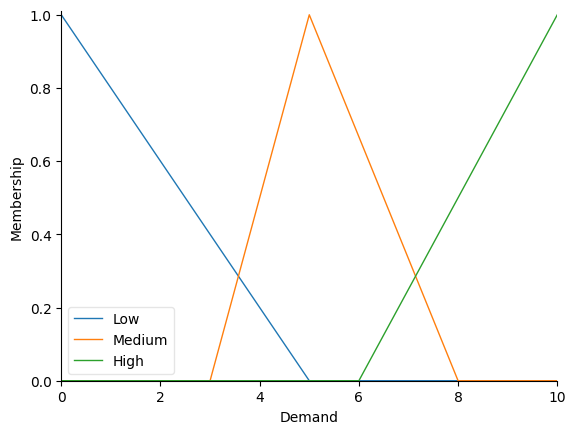

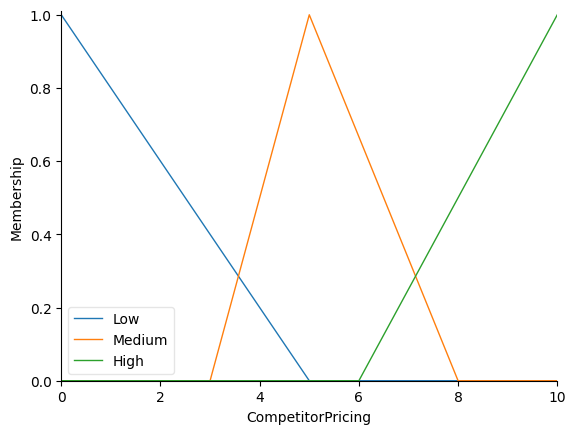

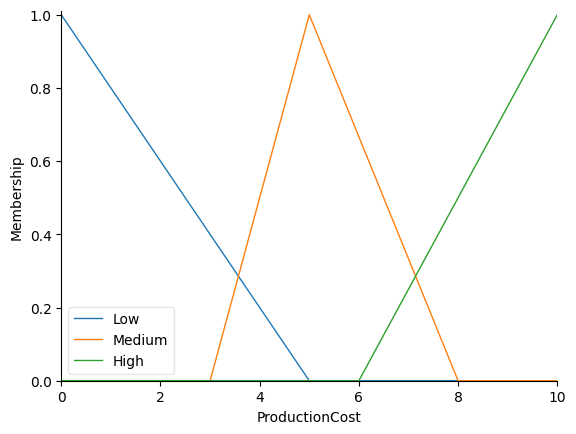

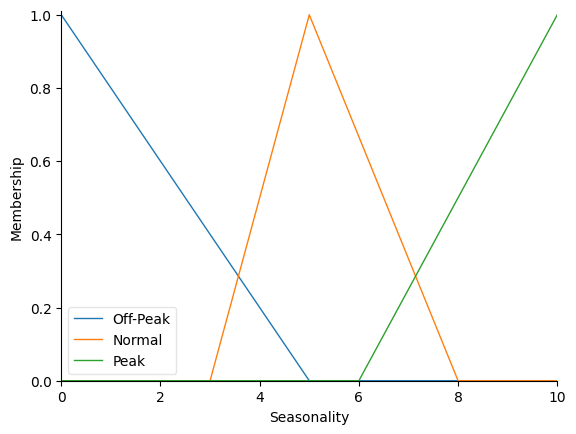

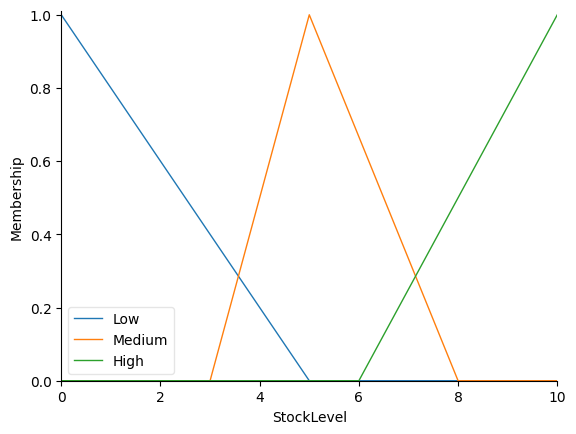

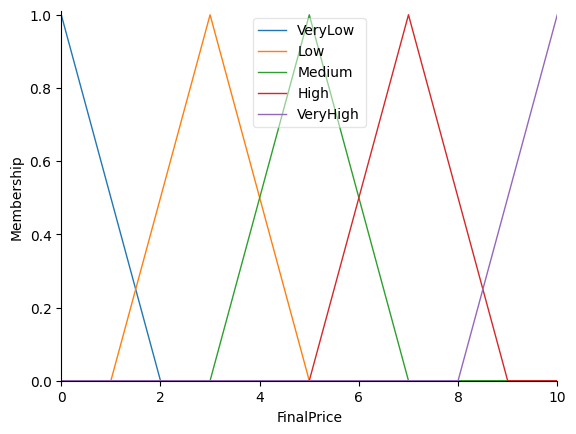

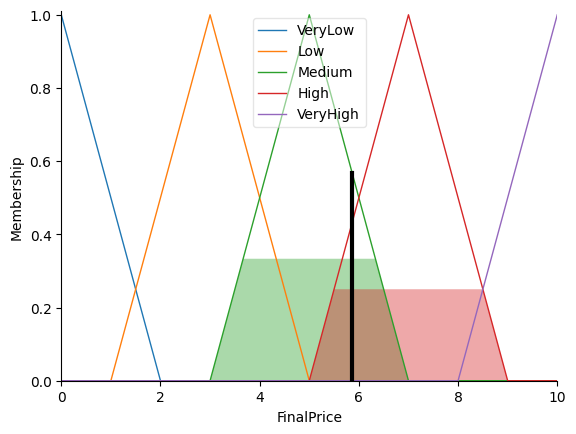

In [27]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Khai báo biến đầu vào
Demand = ctrl.Antecedent(np.arange(0, 10.1, 1), 'Demand')
CompetitorPricing = ctrl.Antecedent(np.arange(0, 10.1, 1), 'CompetitorPricing')
ProductionCost = ctrl.Antecedent(np.arange(0, 10.1, 1), 'ProductionCost')
Seasonality = ctrl.Antecedent(np.arange(0, 10.1, 1), 'Seasonality')
StockLevel = ctrl.Antecedent(np.arange(0, 10.1, 1), 'StockLevel')

# Khai báo biến đầu ra
FinalPrice = ctrl.Consequent(np.arange(0, 10.1, 1), 'FinalPrice')

# Định nghĩa tập mờ
Demand['Low'] = fuzz.trimf(Demand.universe, [0, 0, 5])
Demand['Medium'] = fuzz.trimf(Demand.universe, [3, 5, 8])
Demand['High'] = fuzz.trimf(Demand.universe, [6, 10, 10])

CompetitorPricing['Low'] = fuzz.trimf(CompetitorPricing.universe, [0, 0, 5])
CompetitorPricing['Medium'] = fuzz.trimf(CompetitorPricing.universe, [3, 5, 8])
CompetitorPricing['High'] = fuzz.trimf(CompetitorPricing.universe, [6, 10, 10])

ProductionCost['Low'] = fuzz.trimf(ProductionCost.universe, [0, 0, 5])
ProductionCost['Medium'] = fuzz.trimf(ProductionCost.universe, [3, 5, 8])
ProductionCost['High'] = fuzz.trimf(ProductionCost.universe, [6, 10, 10])

Seasonality['Off-Peak'] = fuzz.trimf(Seasonality.universe, [0, 0, 5])
Seasonality['Normal'] = fuzz.trimf(Seasonality.universe, [3, 5, 8])
Seasonality['Peak'] = fuzz.trimf(Seasonality.universe, [6, 10, 10])

StockLevel['Low'] = fuzz.trimf(StockLevel.universe, [0, 0, 5])
StockLevel['Medium'] = fuzz.trimf(StockLevel.universe, [3, 5, 8])
StockLevel['High'] = fuzz.trimf(StockLevel.universe, [6, 10, 10])

FinalPrice['VeryLow'] = fuzz.trimf(FinalPrice.universe, [0, 0, 2])
FinalPrice['Low'] = fuzz.trimf(FinalPrice.universe, [1, 3, 5])
FinalPrice['Medium'] = fuzz.trimf(FinalPrice.universe, [3, 5, 7])
FinalPrice['High'] = fuzz.trimf(FinalPrice.universe, [5, 7, 9])
FinalPrice['VeryHigh'] = fuzz.trimf(FinalPrice.universe, [8, 10, 10])

Demand.view()
CompetitorPricing.view()
ProductionCost.view()
Seasonality.view()
StockLevel.view()
FinalPrice.view()

# Định nghĩa luật mờ
rule1 = ctrl.Rule(Demand['High'] & CompetitorPricing['High'] & StockLevel['Low'], FinalPrice['VeryHigh'])
rule2 = ctrl.Rule(Demand['High'] & Seasonality['Peak'] & StockLevel['Low'], FinalPrice['VeryHigh'])
rule3 = ctrl.Rule(Demand['Medium'] & ProductionCost['High'] & StockLevel['Low'], FinalPrice['VeryHigh'])

rule4 = ctrl.Rule(Demand['High'] & CompetitorPricing['Medium'] & StockLevel['Medium'], FinalPrice['High'])
rule5 = ctrl.Rule(Demand['Medium'] & CompetitorPricing['High'] & StockLevel['Low'], FinalPrice['High'])
rule6 = ctrl.Rule(Demand['High'] & Seasonality['Peak'] & StockLevel['Medium'], FinalPrice['High'])

rule7 = ctrl.Rule(Demand['Medium'] & CompetitorPricing['Medium'] & StockLevel['Medium'], FinalPrice['Medium'])
rule8 = ctrl.Rule(Demand['Low'] & CompetitorPricing['High'] & StockLevel['Medium'], FinalPrice['Medium'])
rule9 = ctrl.Rule(Demand['Medium'] & ProductionCost['Medium'] & StockLevel['Medium'], FinalPrice['Medium'])

rule10 = ctrl.Rule(Demand['Low'] & CompetitorPricing['Low'] & StockLevel['High'], FinalPrice['Low'])
rule11 = ctrl.Rule(Demand['Medium'] & ProductionCost['Low'] & StockLevel['High'], FinalPrice['Low'])
rule12 = ctrl.Rule(Demand['Low'] & Seasonality['Off-Peak'] & StockLevel['High'], FinalPrice['Low'])


# Kết hợp các luật vào hệ thống điều khiển
pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
pricing = ctrl.ControlSystemSimulation(pricing_ctrl)

# Nhập giá trị đầu vào
pricing.input['Demand'] = 7  # Cầu trung bình
pricing.input['CompetitorPricing'] = 6  # Giá đối thủ cạnh tranh cao
pricing.input['ProductionCost'] = 4  # Chi phí sản xuất trung bình
pricing.input['Seasonality'] = 3  # Mùa bình thường
pricing.input['StockLevel'] = 5  # Mức tồn kho trung bình

# Tính toán
pricing.compute()

# In kết quả
print(pricing.output['FinalPrice'])
# Hiển thị đồ thị
FinalPrice.view(sim=pricing)
